In [2]:
install.packages("diptest")
library(DHARMa)
library(lindia)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(modEvA)
library(dplyr)
library(lme4) #random effect
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova
library(lmerTest) #like lmer but with p-value
library(emmeans) #visualize interaction term
library(betareg) #beta regression: for modeling beta-distributed dependent variables, e.g., rates and proportions
library(diptest)

#levenetest
library(car)

library(rstanarm) #r2 in mixed effect models
library(performance) #r2 in mixed effect models

Warning message:
"package 'diptest' is in use and will not be installed"


In [3]:
citation("DHARMa")


To cite package 'DHARMa' in publications use:

  Florian Hartig (2020). DHARMa: Residual Diagnostics for Hierarchical
  (Multi-Level / Mixed) Regression Models. R package version 0.3.3.0.
  https://CRAN.R-project.org/package=DHARMa

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {DHARMa: Residual Diagnostics for Hierarchical (Multi-Level / Mixed)
Regression Models},
    author = {Florian Hartig},
    year = {2020},
    note = {R package version 0.3.3.0},
    url = {https://CRAN.R-project.org/package=DHARMa},
  }


# Download data

In [6]:
#path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/chapter0_final_/visual/Treatment&Classs/adaptability/chapter0_final__percentgaeHensNotMovingTreatment.csv'
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/correctlightschedule_/visual/Treatment&Classs/adaptability'
df = read.csv(file.path(path_,'STATInterIntraDifferences.csv'), header = TRUE, sep = ";")
#df = read.csv(file.path(path_,'STATpercentgaeHensNotMovingTreatmentPenmonth1.csv'), header = TRUE, sep = ";")
#df$SQRTPercentagenotmoving <- sqrt(df$Percentagenotmoving)
df$Treatment = as.factor(df$Treatment) 
df$PenID = as.factor(df$PenID)
df$henID1 = as.factor(df$henID1)
df$henID2 = as.factor(df$henID2)
df$inter_intra = as.factor(df$inter_intra)
df$DIB = as.integer(df$DIB) #as factor as within a week its not th etime taht we want to take into acount, but the event
df$HenID1_CLASS = as.factor(df$HenID1_CLASS)
df$HenID2_CLASS = as.factor(df$HenID2_CLASS)
df$overallCLASS = as.factor(df$overallCLASS)
df$sqrtchi2distance = sqrt(df$chi2distance)
df$sqrtsqrtchi2distance = sqrt(sqrt(df$chi2distance))
df$factDIB = as.factor(df$DIB)
df$weeks_in_laying_barn = as.factor(df$weeks_in_laying_barn)
name = 'firsttry'
print(dim(df))
summary(df)
head(df, 3)

[1] 11918    50


       X              DIB             DOA        Treatment       henID1     
 Min.   :    0   Min.   : 1.00   Min.   :119.0   OFH :5810   hen_10 :   96  
 1st Qu.: 2979   1st Qu.:19.00   1st Qu.:137.0   TRAN:6108   hen_108:   96  
 Median : 5958   Median :30.00   Median :148.0               hen_111:   96  
 Mean   : 5958   Mean   :29.72   Mean   :147.7               hen_112:   96  
 3rd Qu.: 8938   3rd Qu.:42.00   3rd Qu.:160.0               hen_117:   96  
 Max.   :11917   Max.   :53.00   Max.   :171.0               hen_118:   96  
                                                             (Other):11342  
     henID2      inter_intra      PenID      HenID1_CLASS HenID2_CLASS
 hen_118:  108   inter:5959   pen10  :1728   LEXP :2336   LEXP :2283  
 hen_69 :  107   intra:5959   pen11  :1728   MEXP :3334   MEXP :3399  
 hen_9  :  107                pen12  :1516   Other:6248   Other:6236  
 hen_143:  106                pen8   :1472                            
 hen_99 :  106               

,X,DIB,DOA,Treatment,henID1,henID2,inter_intra,PenID,HenID1_CLASS,HenID2_CLASS,...,min_nbr_stays_1_Zone,max_nbr_stays_1_Zone,min_nbr_stays_5_Zone_cat,max_nbr_stays_5_Zone_cat,X5_Zone_is_samerange,is_only_other,overallCLASS,sqrtchi2distance,sqrtsqrtchi2distance,factDIB
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>
1,0,1,119,OFH,hen_102,hen_102,intra,pen3,MEXP,MEXP,...,0,0,0-4,0-4,True,False,MEXP-MEXP,0.3591534,0.5992941,1
2,1,1,119,OFH,hen_104,hen_102,inter,pen3,Other,MEXP,...,0,0,0-4,0-4,True,False,MEXP-Other,0.4711644,0.6864142,1
3,2,1,119,OFH,hen_102,hen_94,inter,pen3,MEXP,LEXP,...,0,0,0-4,0-4,True,False,LEXP-MEXP,0.3591534,0.5992941,1


In [5]:
df_NOMEXP = df[ which(df$is_only_other=='True'), ]
summary(df_NOMEXP)

       X              DIB             DOA        Treatment       henID1    
 Min.   :   13   Min.   : 1.00   Min.   :119.0   OFH :2252   hen_87 :  84  
 1st Qu.: 3025   1st Qu.:19.00   1st Qu.:137.0   TRAN:2426   hen_118:  80  
 Median : 5962   Median :30.00   Median :148.0               hen_14 :  77  
 Mean   : 5964   Mean   :29.73   Mean   :147.7               hen_22 :  77  
 3rd Qu.: 8936   3rd Qu.:42.00   3rd Qu.:160.0               hen_108:  76  
 Max.   :11916   Max.   :53.00   Max.   :171.0               hen_112:  76  
                                                             (Other):4208  
     henID2     inter_intra      PenID     HenID1_CLASS HenID2_CLASS
 hen_118:  85   inter:1554   pen11  :837   LEXP :   0   LEXP :   0  
 hen_111:  81   intra:3124   pen8   :634   MEXP :   0   MEXP :   0  
 hen_62 :  80                pen10  :623   Other:4678   Other:4678  
 hen_87 :  79                pen4   :607                            
 hen_112:  78                pen12  :562       

# Mixed effect model on day-1 intra vs inter

In [13]:
df_DOA1 = df[ which(df$DIB==1), ]
df_DOA1 = df_DOA1[which(df_DOA1$is_only_other=='True'), ]
summary(df_DOA1)

       X               DIB         DOA      Treatment     henID1       henID2  
 Min.   : 13.00   Min.   :1   Min.   :119   OFH :46   hen_103: 2   hen_126: 3  
 1st Qu.: 73.75   1st Qu.:1   1st Qu.:119   TRAN:54   hen_105: 2   hen_155: 3  
 Median :126.50   Median :1   Median :119             hen_107: 2   hen_104: 2  
 Mean   :131.24   Mean   :1   Mean   :119             hen_111: 2   hen_107: 2  
 3rd Qu.:183.25   3rd Qu.:1   3rd Qu.:119             hen_112: 2   hen_108: 2  
 Max.   :260.00   Max.   :1   Max.   :119             hen_114: 2   hen_110: 2  
                                                      (Other):88   (Other):86  
 inter_intra     PenID    HenID1_CLASS HenID2_CLASS weeks_in_laying_barn
 inter:31    pen11  :16   LEXP :  0    LEXP :  0    1      :100         
 intra:69    pen8   :16   MEXP :  0    MEXP :  0    2      :  0         
             pen4   :14   Other:100    Other:100    3      :  0         
             pen12  :13                             4      :  0     

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
sqrtchi2distance ~ max_Total_number_transition + min_Total_number_transition +  
    inter_intra + Treatment + (1 | PenID)
   Data: df_DOA1

REML criterion at convergence: 15.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.31467 -0.67885 -0.03803  0.63517  2.51263 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 0.003833 0.06191 
 Residual             0.049442 0.22236 
Number of obs: 100, groups:  PenID, 8

Fixed effects:
                             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                  0.557169   0.070215 23.481877   7.935 4.26e-08 ***
max_Total_number_transition  0.009199   0.003443 91.997874   2.672  0.00892 ** 
min_Total_number_transition -0.013081   0.004660 94.069152  -2.807  0.00608 ** 
inter_intraintra            -0.231993   0.050647 91.494305  -4.581 1.46e-05 ***
TreatmentTRAN           

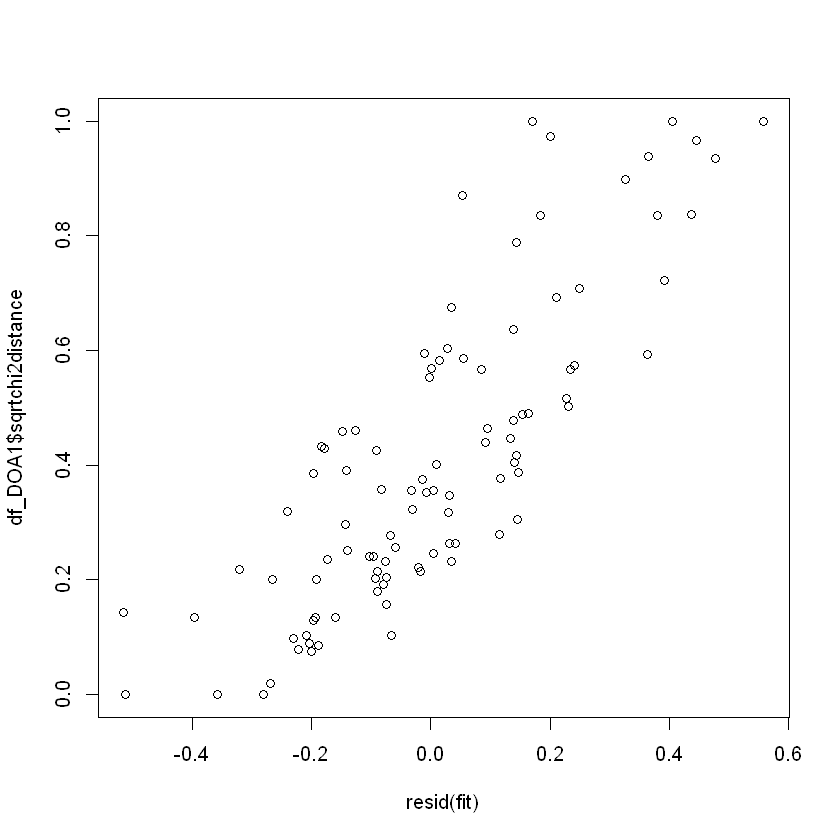

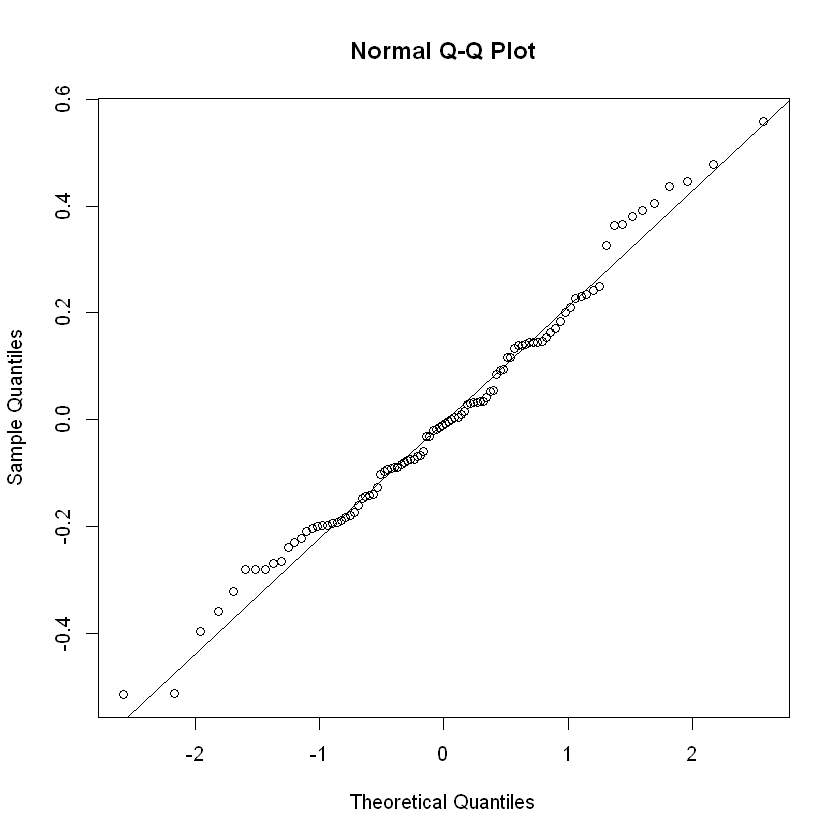

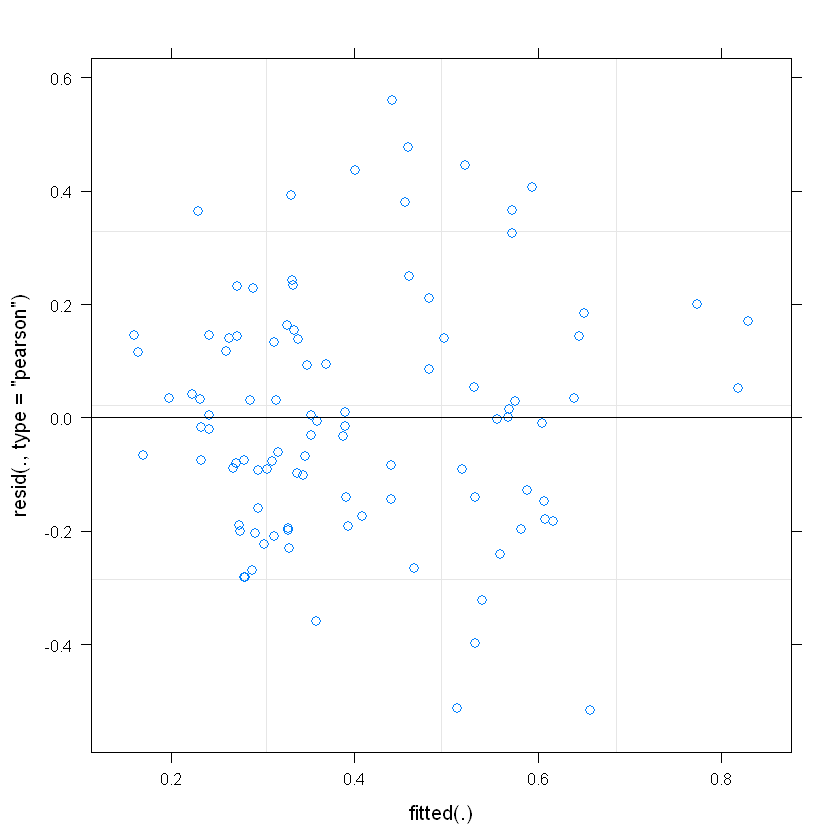

In [50]:
#with only non mexp
#does not converge with: (1|PenID/henID2)
df_DOA1$sqrtchi2distance = sqrt(df_DOA1$chi2distance)
df_DOA1$logchi2distance = log(df_DOA1$chi2distance+1)

fit = lmer(sqrtchi2distance ~ max_Total_number_transition + min_Total_number_transition + inter_intra + Treatment + (1|PenID), 
           data=df_DOA1)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
plot(resid(fit),df_DOA1$sqrtchi2distance)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logDTW_15_5_Zone ~ min_nbr_stays_5_Zone + max_nbr_stays_5_Zone +  
    inter_intra + Treatment + (1 | PenID)
   Data: df_DOA1

REML criterion at convergence: 309.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4524 -0.1733  0.1863  0.5585  1.2855 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 0.09741  0.3121  
 Residual             1.16971  1.0815  
Number of obs: 100, groups:  PenID, 8

Fixed effects:
                     Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            4.0916     0.3231 22.0294  12.665 1.38e-11 ***
min_nbr_stays_5_Zone  -0.1487     0.1160 94.0112  -1.281   0.2032    
max_nbr_stays_5_Zone   0.1334     0.0893 93.4419   1.494   0.1385    
inter_intraintra      -0.4015     0.2404 92.2492  -1.670   0.0983 .  
TreatmentTRAN          0.3108     0.3196  6.5670   0.973   0.3652    
---
Signif. codes:  0 '***' 

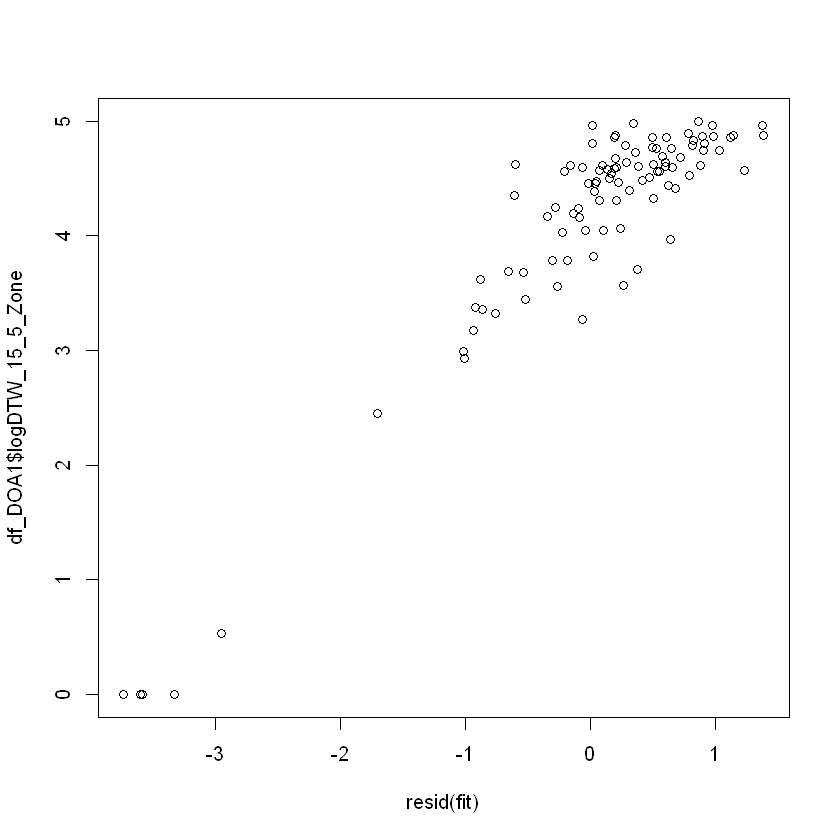

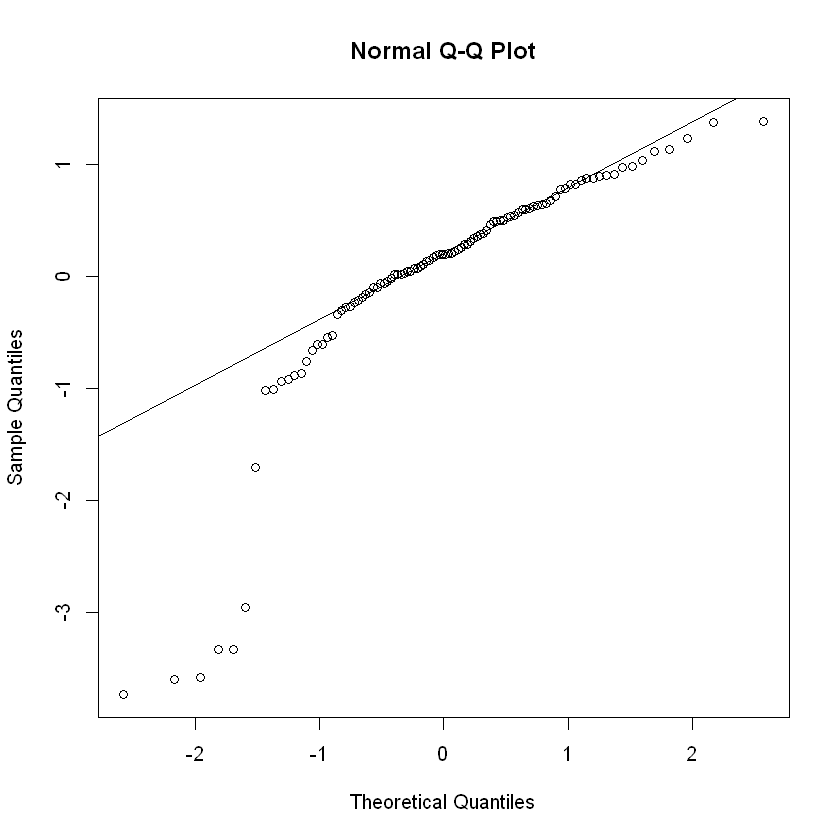

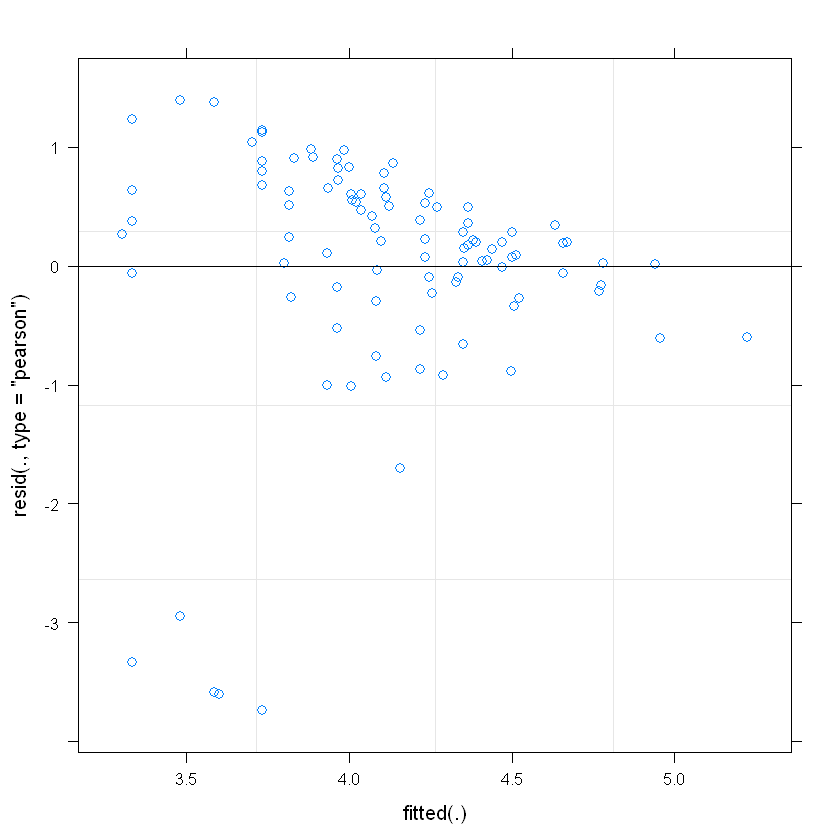

In [60]:
#with only non mexp
#does not converge with: (1|PenID/henID2)
df_DOA1$sqrtDTW_15_5_Zone = sqrt(df_DOA1$DTW_15_5_Zone)
df_DOA1$logDTW_15_5_Zone = log(df_DOA1$DTW_15_5_Zone+1)

fit = lmer(logDTW_15_5_Zone ~ min_nbr_stays_5_Zone + max_nbr_stays_5_Zone + inter_intra + Treatment + (1|PenID), 
           data=df_DOA1)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
plot(resid(fit),df_DOA1$logDTW_15_5_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sqrtDTW_15_3_Zone ~ min_nbr_stays_3_Zone + max_nbr_stays_3_Zone +  
    inter_intra + Treatment + (1 | PenID)
   Data: df_DOA1

REML criterion at convergence: 487

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3458 -0.6136  0.1900  0.7837  1.7666 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 0.5376   0.7332  
 Residual             7.3162   2.7049  
Number of obs: 100, groups:  PenID, 8

Fixed effects:
                     Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           6.79045    0.85798 28.90985   7.914 1.02e-08 ***
min_nbr_stays_3_Zone  0.12878    0.12641 94.93763   1.019    0.311    
max_nbr_stays_3_Zone  0.10555    0.08758 94.11285   1.205    0.231    
inter_intraintra     -0.54967    0.62065 92.52791  -0.886    0.378    
TreatmentTRAN         0.19827    0.76310  6.43498   0.260    0.803    
---
Signif. codes:  0 '

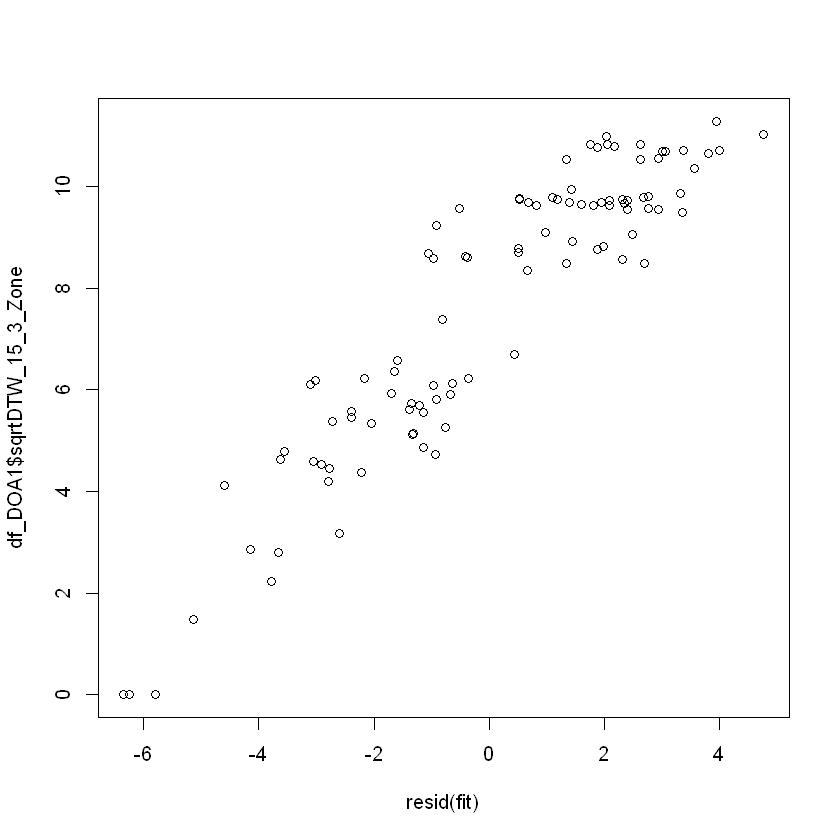

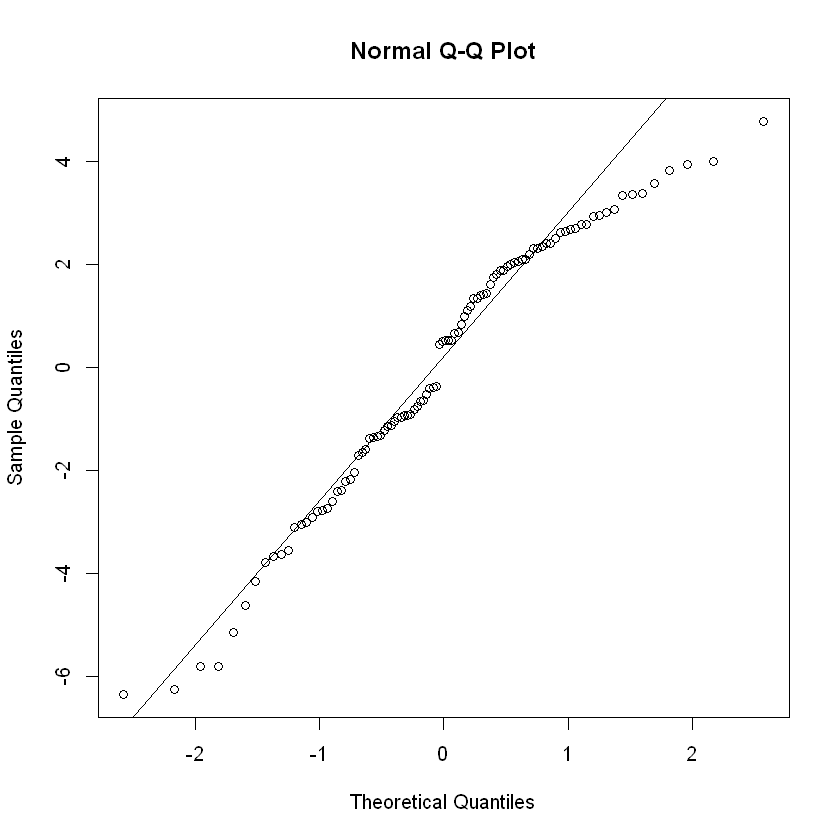

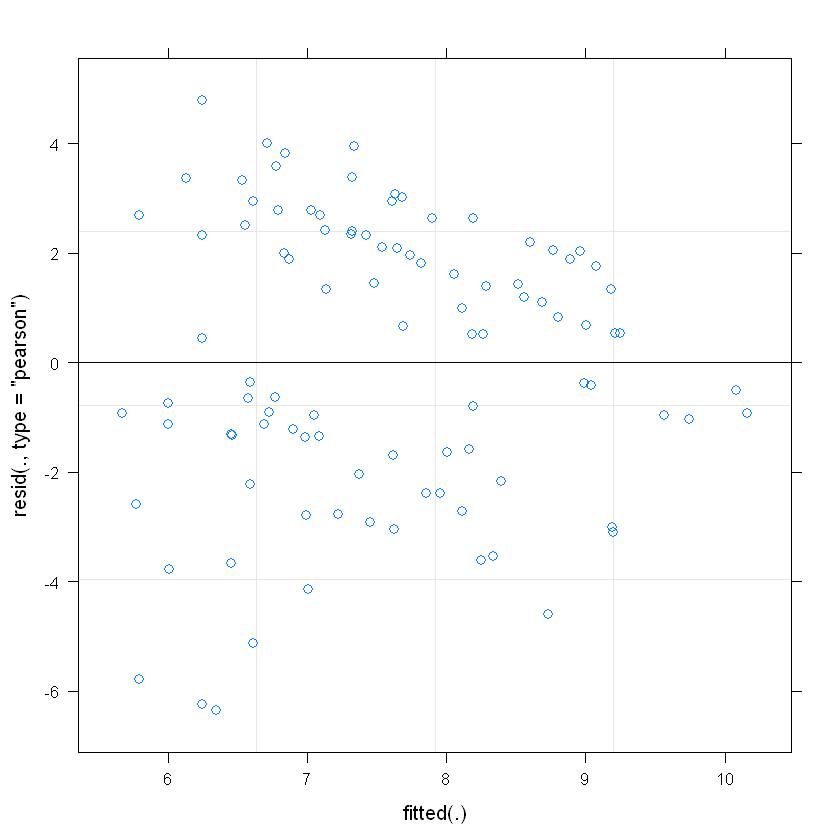

In [64]:
#with only non mexp
#does not converge with: (1|PenID/henID2)
df_DOA1$sqrtDTW_15_3_Zone = sqrt(df_DOA1$DTW_15_3_Zone)
df_DOA1$logDTW_15_3_Zone = log(df_DOA1$DTW_15_3_Zone+1)

fit = lmer(sqrtDTW_15_3_Zone ~ min_nbr_stays_3_Zone + max_nbr_stays_3_Zone + inter_intra + Treatment + (1|PenID), 
           data=df_DOA1)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
plot(resid(fit),df_DOA1$sqrtDTW_15_3_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone +  
    inter_intra + Treatment + (1 | PenID)
   Data: df_DOA1

REML criterion at convergence: 945.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6608 -0.7110 -0.1517  0.6561  3.0159 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   0.0     0.00   
 Residual             953.1    30.87   
Number of obs: 100, groups:  PenID, 8

Fixed effects:
                     Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            51.274      9.129  95.000   5.616 1.93e-07 ***
min_nbr_stays_2_Zone   -3.670      1.847  95.000  -1.986   0.0499 *  
max_nbr_stays_2_Zone    3.965      1.196  95.000   3.316   0.0013 ** 
inter_intraintra      -15.827      7.510  95.000  -2.107   0.0377 *  
TreatmentTRAN          -8.300      6.278  95.000  -1.322   0.1893    
---
Signif. codes:  0 '***' 0.0

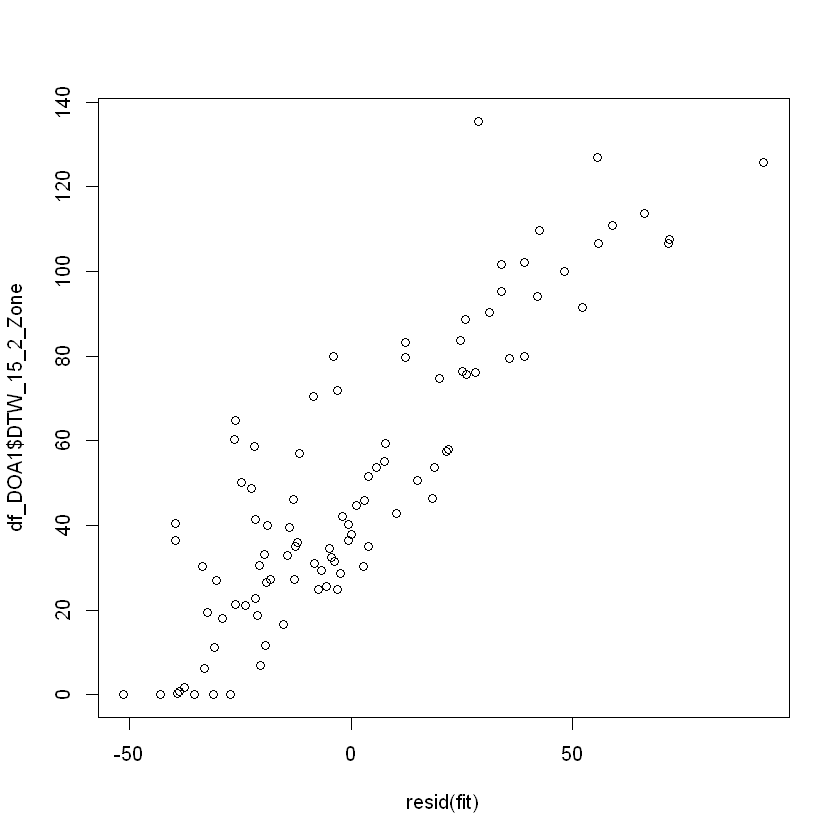

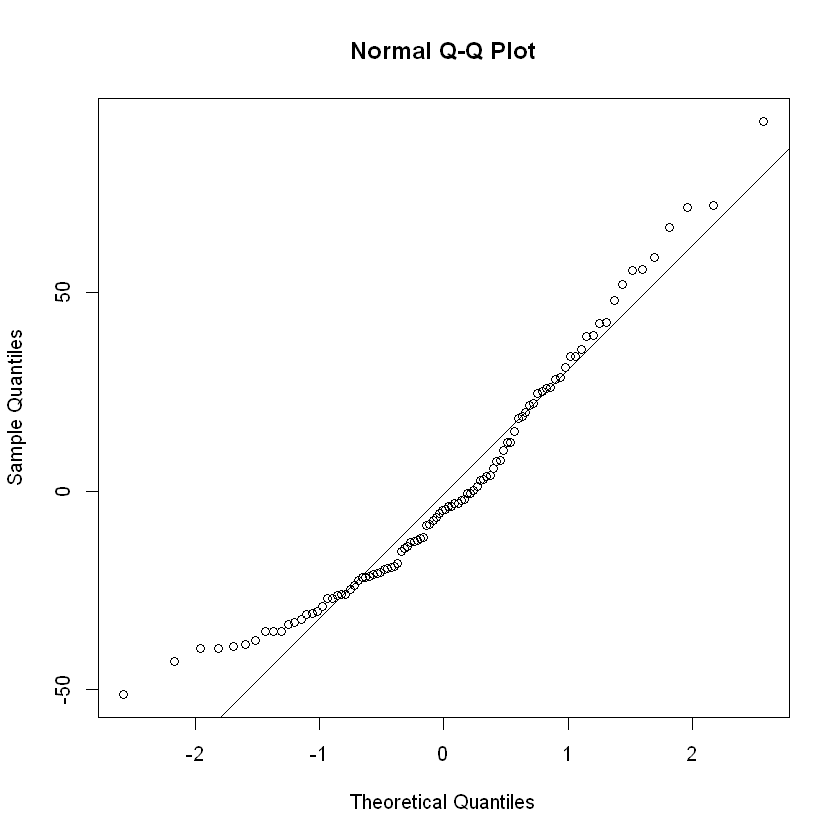

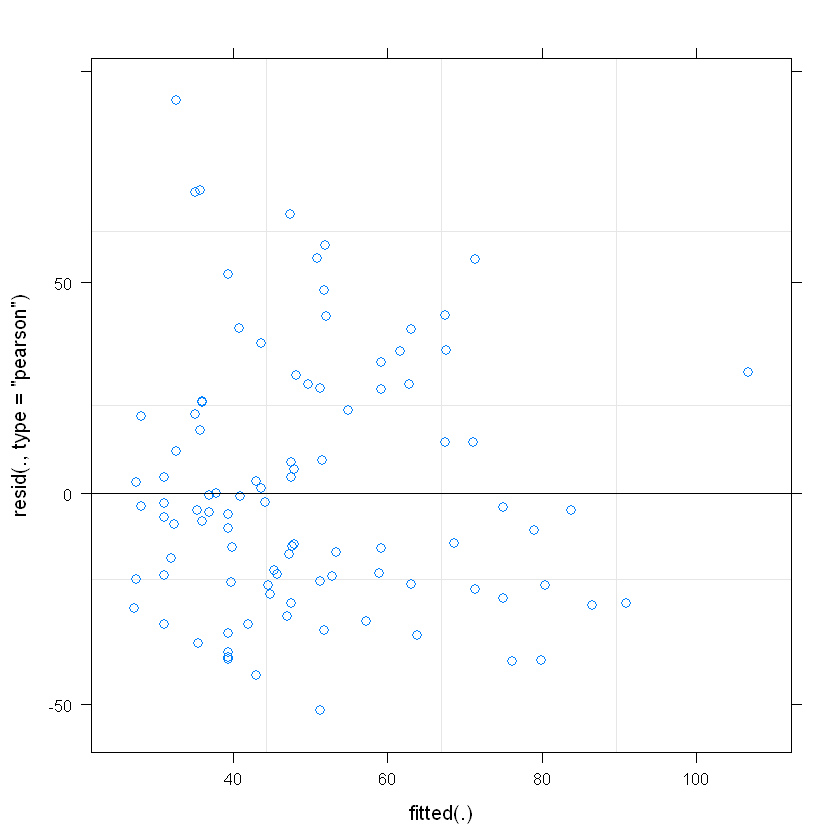

In [56]:
#with only non mexp
#does not converge with: (1|PenID/henID2)
df_DOA1$sqrtDTW_15_2_Zone = sqrt(df_DOA1$DTW_15_2_Zone)
df_DOA1$logDTW_15_2_Zone = log(df_DOA1$DTW_15_2_Zone+1)

fit = lmer(DTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone + inter_intra + Treatment + (1|PenID), 
           data=df_DOA1)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
plot(resid(fit),df_DOA1$DTW_15_2_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

# Mixed effect models on distances' measure

#does not converge with: (1|PenID/henID2)
fit = lmer(DTW_15_5_Zone ~ max_5Z_cat + min_5Z_cat + DIB*is_same_ind + Treatment + (1|PenID/henID1), data=df)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

In [ ]:
Both DIB and inter_intra are important, but the contribution of DIB depends on the level of inter_intra

In [27]:
all(is.na(df$min_nbr_stays_5_Zone))

[1] FALSE

In [17]:
#with only non mexp
#does not converge with: (1|PenID/henID2)
fit = lmer(DTW_15_5_Zone ~ min_nbr_stays_5_Zone + max_nbr_stays_5_Zone + DIB + inter_intra + DIB*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)), 
           data=df_NOMEXP)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

Warning message in Ops.factor(PenID, henID1):
"'/' not meaningful for factors"
Warning message in Ops.factor(1, factor(DIB)):
"'|' not meaningful for factors"


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [87]:
anova(fit)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
min_nbr_stays_5_Zone,40482.531,40482.531,1,4644.034556,40.6420183,2.005946e-10
max_nbr_stays_5_Zone,59809.586,59809.586,1,4600.620320,60.0452161,1.133034e-14
DIB,7243.741,7243.741,1,62.010146,7.2722794,9.005187e-03
inter_intra,72495.059,72495.059,1,4588.712072,72.7806650,1.942924e-17
Treatment,563.054,563.054,1,6.225738,0.5652723,4.795933e-01
DIB:inter_intra,13630.481,13630.481,1,4583.931614,13.6841800,2.188027e-04


In [95]:
#does not converge with: (1|PenID/henID2)
fit = lmer(DTW_15_5_Zone ~ min_nbr_stays_5_Zone + max_nbr_stays_5_Zone + DIB + inter_intra + DIB*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)) + (1|HenID1_CLASS) + (1|HenID2_CLASS), data=df)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DTW_15_5_Zone ~ min_nbr_stays_5_Zone + max_nbr_stays_5_Zone +  
    DIB + inter_intra + DIB * inter_intra + Treatment + (1 |  
    PenID/henID1) + (1 | factor(DIB)) + (1 | HenID1_CLASS) +  
    (1 | HenID2_CLASS)
   Data: df

REML criterion at convergence: 116326.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.93513 -0.74400 -0.05168  0.77684  2.91281 

Random effects:
 Groups       Name        Variance Std.Dev.
 henID1:PenID (Intercept)  32.1180  5.6673 
 factor(DIB)  (Intercept)   5.9882  2.4471 
 PenID        (Intercept)   5.8447  2.4176 
 HenID2_CLASS (Intercept)   1.1662  1.0799 
 HenID1_CLASS (Intercept)   0.7125  0.8441 
 Residual                 994.9513 31.5428 
Number of obs: 11918, groups:  
henID1:PenID, 132; factor(DIB), 50; PenID, 8; HenID2_CLASS, 3; HenID1_CLASS, 3

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    


In [96]:
#rand: Likelihood Ratio Test On Random Effects Of Linear Mixed Effects Model
#tests the hypothesis that the random effect variation is significant versus the null that there is no between group-level 
#variation
rand(fit)

boundary (singular) fit: see ?isSingular

Warning message:
"Model failed to converge with 1 negative eigenvalue: -7.7e+02"


,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,13,-58163.24,116352.5,NA,NA,NA
(1 | henID1:PenID),12,-58255.93,116535.9,185.3880798,1,3.229069e-42
(1 | PenID),12,-58166.06,116356.1,5.6441181,1,1.751402e-02
(1 | factor(DIB)),12,-58175.23,116374.5,23.9744922,1,9.762049e-07
(1 | HenID1_CLASS),12,-58163.41,116350.8,0.3468148,1,5.559218e-01
(1 | HenID2_CLASS),12,-58165.60,116355.2,4.7294294,1,2.965072e-02


In [97]:
#ranef(fit)

In [98]:
#confint(fit)

# Assumptions

In [41]:
#df_NOMEXP = df[which(df$is_only_other=='True'), ]
df$logDTW_15_2_Zone = log(df$DTW_15_2_Zone)
df$sqrtDTW_15_2_Zone = sqrt(df$DTW_15_2_Zone)
df$logDTW_15_5_Zone = log(df$DTW_15_5_Zone)
df$sqrtDTW_15_5_Zone = sqrt(df$DTW_15_5_Zone)
df$logDTW_15_3_Zone = log(df$DTW_15_3_Zone)
df$sqrtDTW_15_3_Zone = sqrt(df$DTW_15_3_Zone)
df$weeks_in_laying_barn = as.factor(df$weeks_in_laying_barn)
df$DIB = as.integer(df$DIB)
df_WIB1 = df[which(df$weeks_in_laying_barn=='1'), ]
#df_NOMEXP = df_NOMEXP[which(df_NOMEXP$chi2distance!=0), ] issue come sform the 0 probably
#df_NOMEXP$chi2distance100 = as.integer(df_NOMEXP$chi2distance *100)
summary(df_WIB1)

       X               DIB             DOA        Treatment      henID1    
 Min.   :   0.0   Min.   :1.000   Min.   :119.0   OFH :594   hen_10 :  10  
 1st Qu.: 297.2   1st Qu.:2.000   1st Qu.:120.0   TRAN:596   hen_101:  10  
 Median : 594.5   Median :3.000   Median :121.0              hen_102:  10  
 Mean   : 594.5   Mean   :3.743   Mean   :121.7              hen_103:  10  
 3rd Qu.: 891.8   3rd Qu.:6.000   3rd Qu.:124.0              hen_104:  10  
 Max.   :1189.0   Max.   :7.000   Max.   :125.0              hen_107:  10  
                                                             (Other):1130  
     henID2     inter_intra     PenID     HenID1_CLASS HenID2_CLASS
 hen_155:  17   inter:595   pen10  :180   LEXP :236    LEXP :255   
 hen_48 :  14   intra:595   pen11  :180   MEXP :328    MEXP :321   
 hen_101:  13               pen12  :160   Other:626    Other:614   
 hen_13 :  13               pen4   :160                            
 hen_20 :  13               pen5   :160             

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
sqrtDTW_15_5_Zone ~ sqrt(min_nbr_stays_5_Zone) + sqrt(max_nbr_stays_5_Zone) +  
    DIB + inter_intra + DIB * inter_intra + Treatment + (1 |      henID1)
   Data: df_WIB1

REML criterion at convergence: 6003.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7686 -0.5956  0.1560  0.7225  2.2296 

Random effects:
 Groups   Name        Variance Std.Dev.
 henID1   (Intercept) 0.834    0.9132  
 Residual             8.398    2.8980  
Number of obs: 1190, groups:  henID1, 132

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   7.58231    0.34100  736.96819  22.235  < 2e-16
sqrt(min_nbr_stays_5_Zone)   -1.14048    0.18742 1178.25136  -6.085 1.57e-09
sqrt(max_nbr_stays_5_Zone)    1.61898    0.17204 1139.62414   9.411  < 2e-16
DIB                          -0.13855    0.05226 1080.41232  -2.651  0.00814
inter_intrai

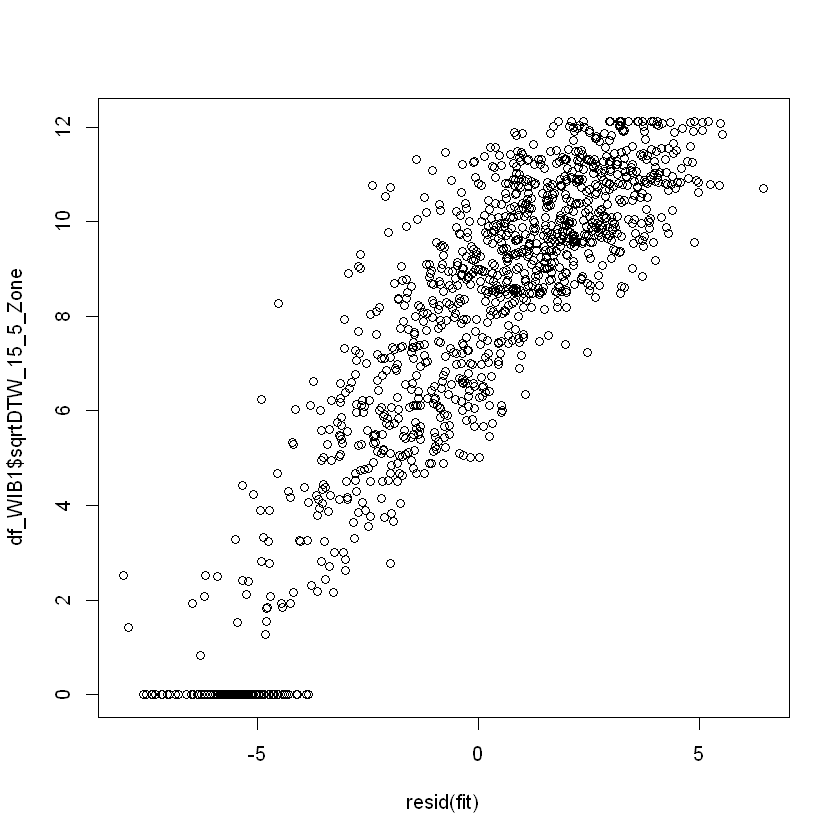

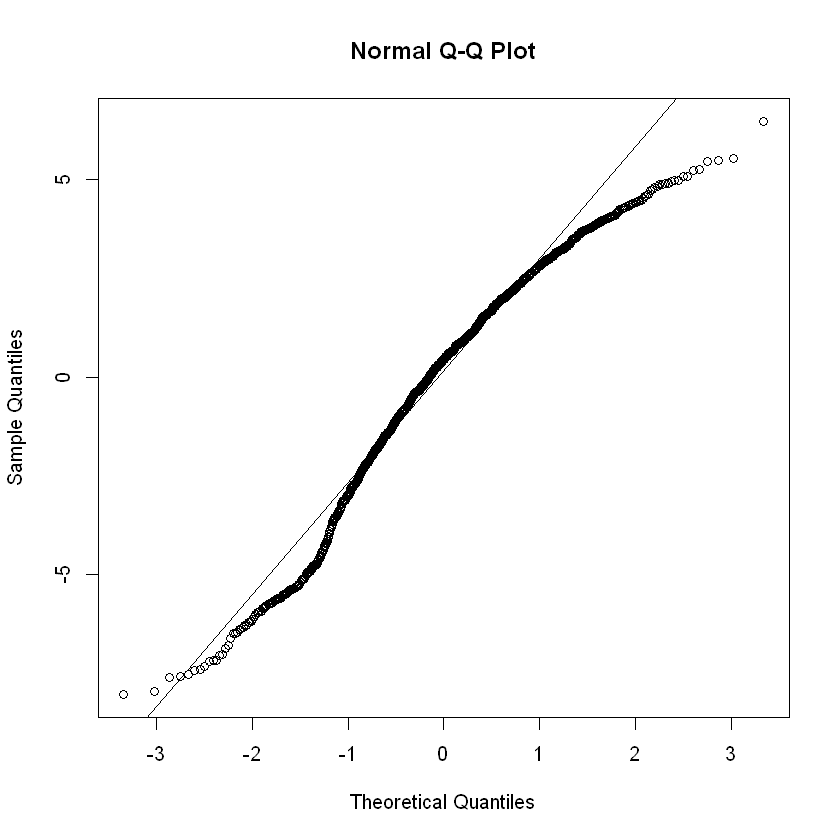

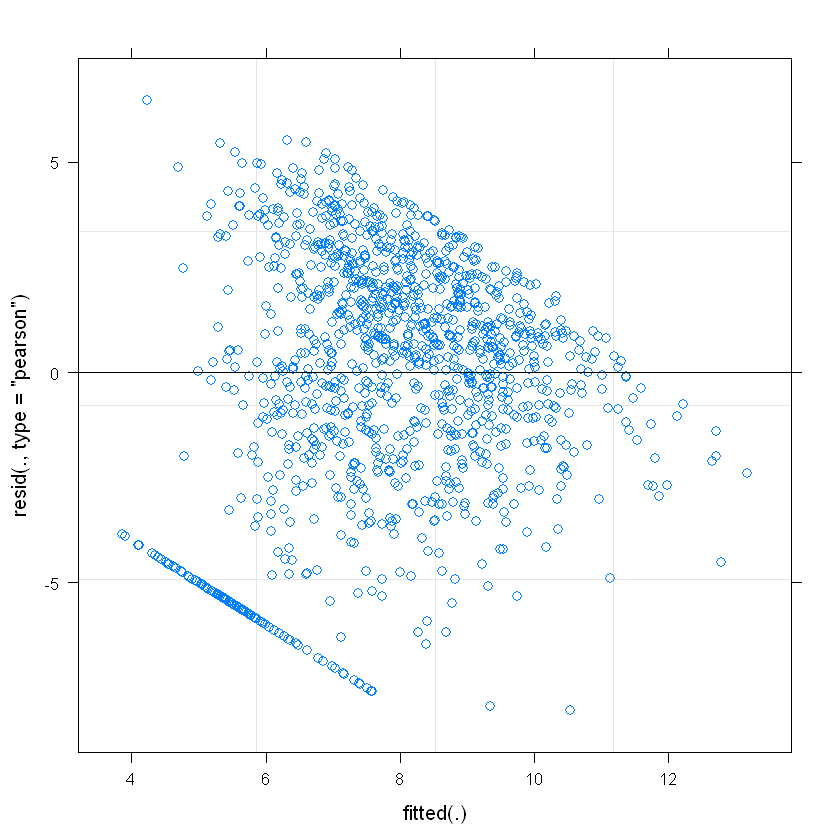

In [42]:
#BEST FOR NOWWW
#Treatment*inter_intra as we expect the treatment o be different in the intra not the inter
#(1|PenID/henID1) :  fail to cvg!!
fit = lmer(sqrtDTW_15_5_Zone ~ sqrt(min_nbr_stays_5_Zone) + sqrt(max_nbr_stays_5_Zone) + DIB + inter_intra + DIB*inter_intra + Treatment + (1|henID1), 
           data=df_WIB1)
summary(fit)
plot(resid(fit),df_WIB1$sqrtDTW_15_5_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) +  
    DIB + inter_intra + DIB * inter_intra + Treatment + (1 |      henID1)
   Data: df_WIB1

REML criterion at convergence: 5094.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0136 -0.6802 -0.1447  0.6178  3.6075 

Random effects:
 Groups   Name        Variance Std.Dev.
 henID1   (Intercept) 0.8098   0.8999  
 Residual             3.7032   1.9244  
Number of obs: 1190, groups:  henID1, 132

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   3.19176    0.23037  621.56450  13.855  < 2e-16
sqrt(min_nbr_stays_2_Zone)   -0.54037    0.08149 1179.86459  -6.631 5.07e-11
sqrt(max_nbr_stays_2_Zone)    2.02459    0.07438 1182.85820  27.220  < 2e-16
DIB                          -0.23051    0.03441 1066.29755  -6.699 3.39e-11
inter_intrai

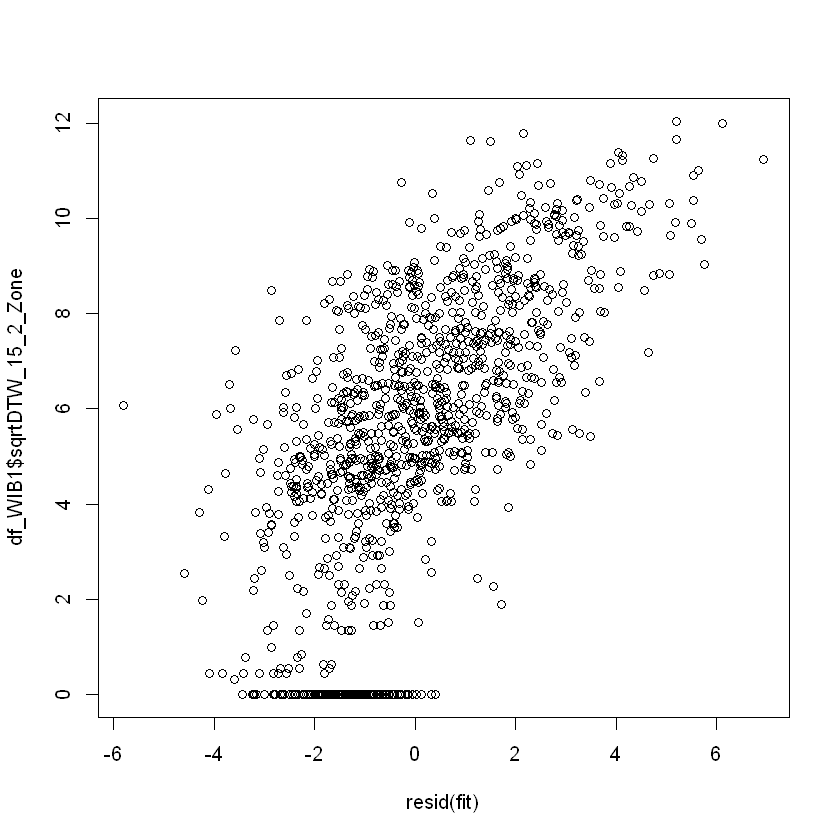

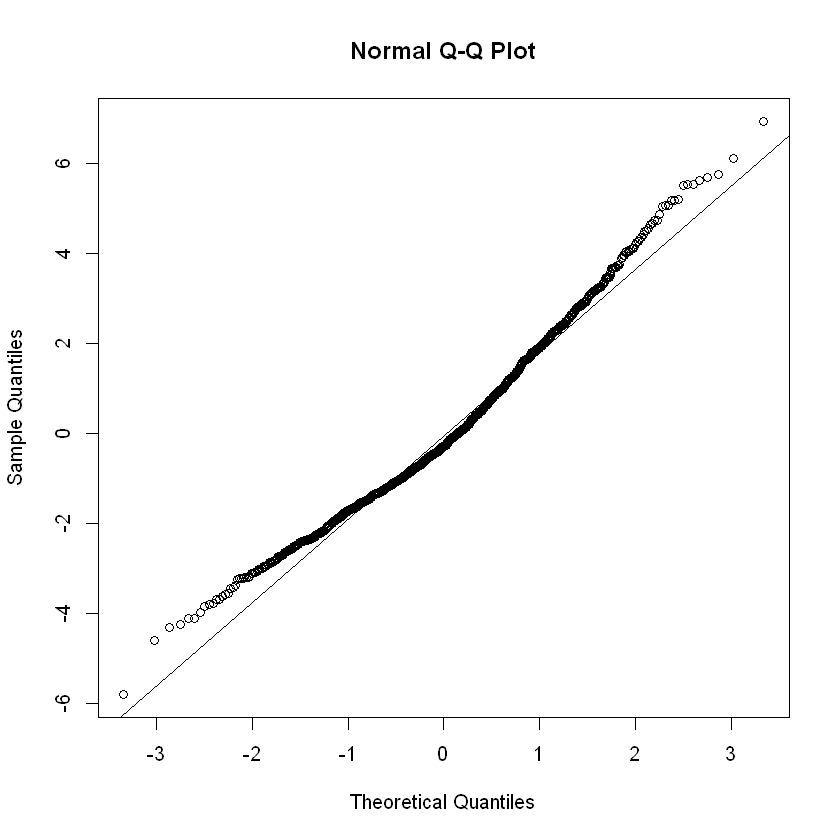

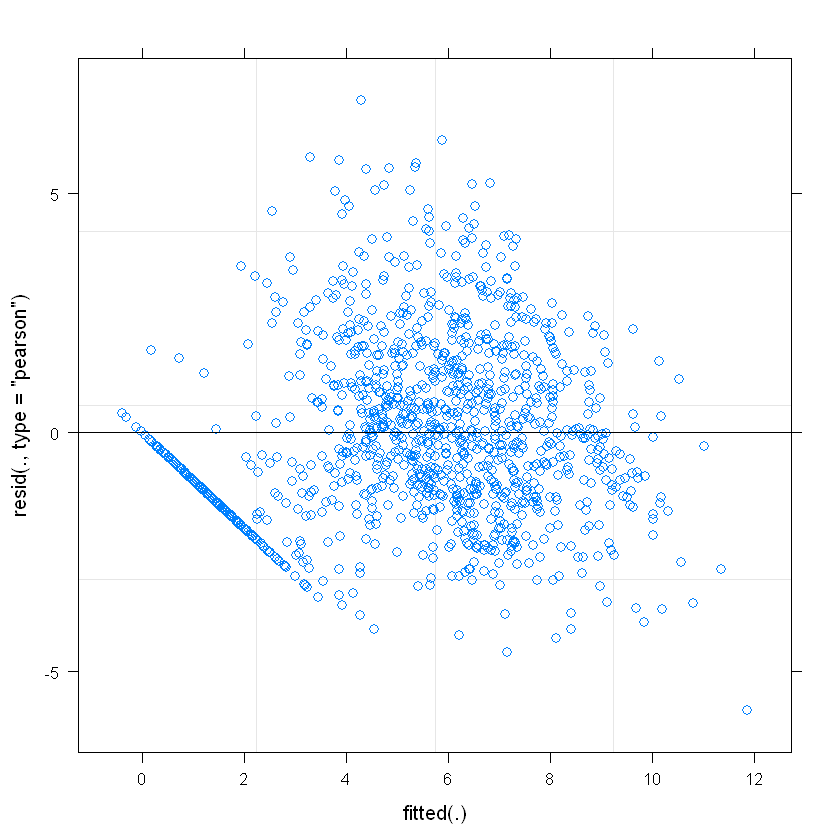

In [40]:
#BEST FOR NOWWW
#Treatment*inter_intra as we expect the treatment o be different in the intra not the inter
#(1|PenID/henID1) :  fail to cvg!!
fit = lmer(sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) + DIB + inter_intra + DIB*inter_intra + Treatment + (1|henID1), 
           data=df_WIB1)
summary(fit)
plot(resid(fit),df_WIB1$sqrtDTW_15_2_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
logDTW_15_2_Zone ~ log(min_nbr_stays_2_Zone + 1) + log(max_nbr_stays_2_Zone +  
    1) + DIB + inter_intra + DIB * inter_intra + Treatment +      (1 | henID1)
   Data: df_WIB1

REML criterion at convergence: 3111.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.60063 -0.67930 -0.07413  0.63599  3.07024 

Random effects:
 Groups   Name        Variance Std.Dev.
 henID1   (Intercept) 0.1703   0.4127  
 Residual             0.6871   0.8289  
Number of obs: 1190, groups:  henID1, 132

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                      1.52546    0.10214  601.76340  14.934  < 2e-16
log(min_nbr_stays_2_Zone + 1)   -0.31780    0.04535 1178.40478  -7.008 4.06e-12
log(max_nbr_stays_2_Zone + 1)    1.43451    0.04281 1182.01516  33.509  < 2e-16
DIB                             -0.08276    0.01483 1063.66811

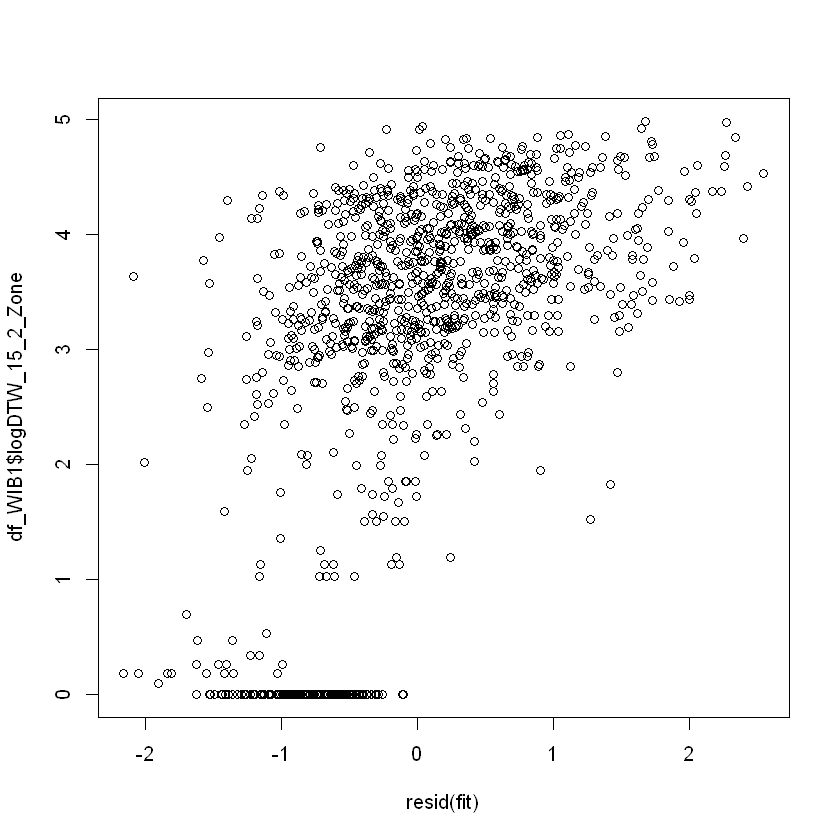

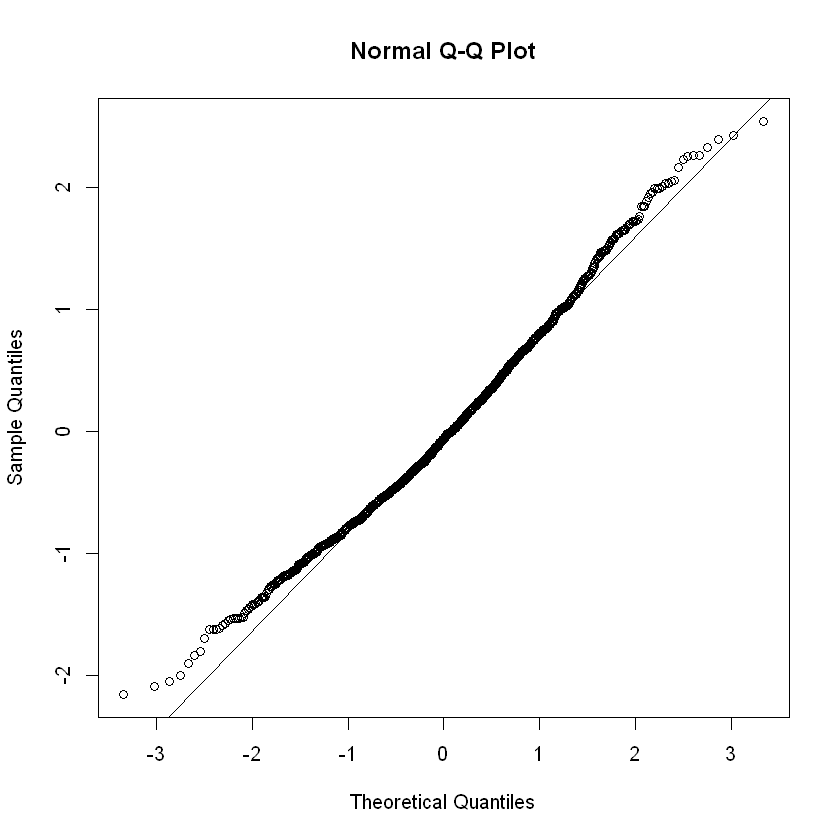

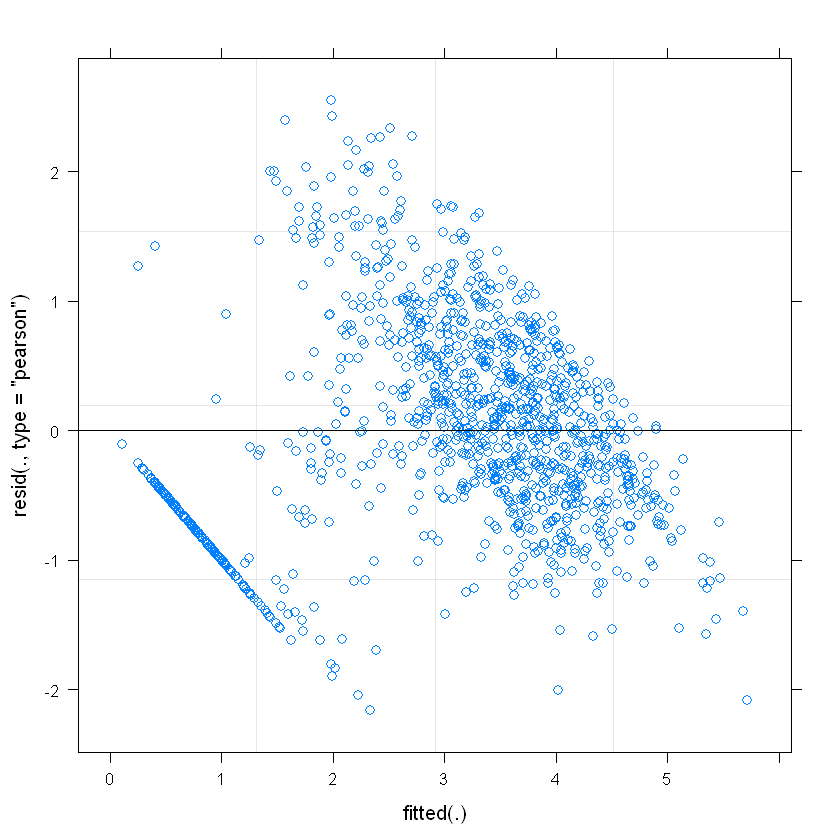

In [31]:
#BEST FOR NOWWW
#Treatment*inter_intra as we expect the treatment o be different in the intra not the inter
#(1|PenID/henID1) :  fail to cvg!!
fit = lmer(logDTW_15_2_Zone ~ log(min_nbr_stays_2_Zone+1) + log(max_nbr_stays_2_Zone+1) + DIB + inter_intra + DIB*inter_intra + Treatment + (1|henID1), 
           data=df_WIB1)
summary(fit)
plot(resid(fit),df_WIB1$logDTW_15_2_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

## Playground

In [ ]:
#BEST FOR NOWWW
#fit = lmer(DTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone + DIB + inter_intra + DIB*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)) + (1|HenID1_CLASS) + (1|HenID2_CLASS), data=df)
#fit = lmer(DTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone + DIB^2 + inter_intra + DIB^2*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)), 
#           data=df_NOMEXP)
#Treatment*inter_intra as we expect the treatment o be different in the intra not the inter
#(1|PenID/henID1) :  fail to cvg!!
fit = lmer(sqrtDTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone + DIB + inter_intra + DIB*inter_intra + Treatment + (1|henID1), 
           data=df_WIB1)
#fit = lmer(sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) + factDIB + inter_intra + factDIB*inter_intra + Treatment*inter_intra + (1|PenID/henID1) +(1|overallCLASS), 
#           data=df)
#fit = lmer(sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) + factDIB + inter_intra + factDIB*inter_intra + Treatment*inter_intra + (1|PenID/henID1), 
#           data=df_NOMEXP)
summary(fit)
plot(resid(fit),df_WIB1$sqrtDTW_15_2_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

In [7]:
#TO READ: https://cran.r-project.org/web/packages/emmeans/vignettes/interactions.html
lsmeans(object=fit, pairwise ~ weeks_in_laying_barn * inter_intra, adjust= "tukey", 
        pbkrtest.limit = 11918, lmerTest.limit = 11918)

$lsmeans
 weeks_in_laying_barn inter_intra lsmean     SE   df lower.CL upper.CL
 1                    inter         3.73 0.0788 67.5     3.58     3.89
 2                    inter         3.55 0.0958 78.1     3.36     3.74
 3                    inter         3.52 0.0721 48.2     3.37     3.66
 4                    inter         3.60 0.0711 45.7     3.46     3.74
 5                    inter         3.31 0.0709 45.1     3.17     3.45
 6                    inter         3.34 0.0718 47.4     3.20     3.49
 7                    inter         3.42 0.0708 44.8     3.28     3.56
 8                    inter         3.37 0.0883 56.7     3.19     3.55
 1                    intra         3.12 0.0787 67.2     2.96     3.28
 2                    intra         3.08 0.0957 77.7     2.89     3.27
 3                    intra         3.18 0.0716 46.8     3.03     3.32
 4                    intra         3.56 0.0708 44.8     3.41     3.70
 5                    intra         3.28 0.0706 44.4     3.14     3.

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 11918' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 11918)' or larger];
but be warned that this may result in large computation time and memory use.

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 11918' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 11918)' or larger];
but be warned that this may result in large computation time and memory use.



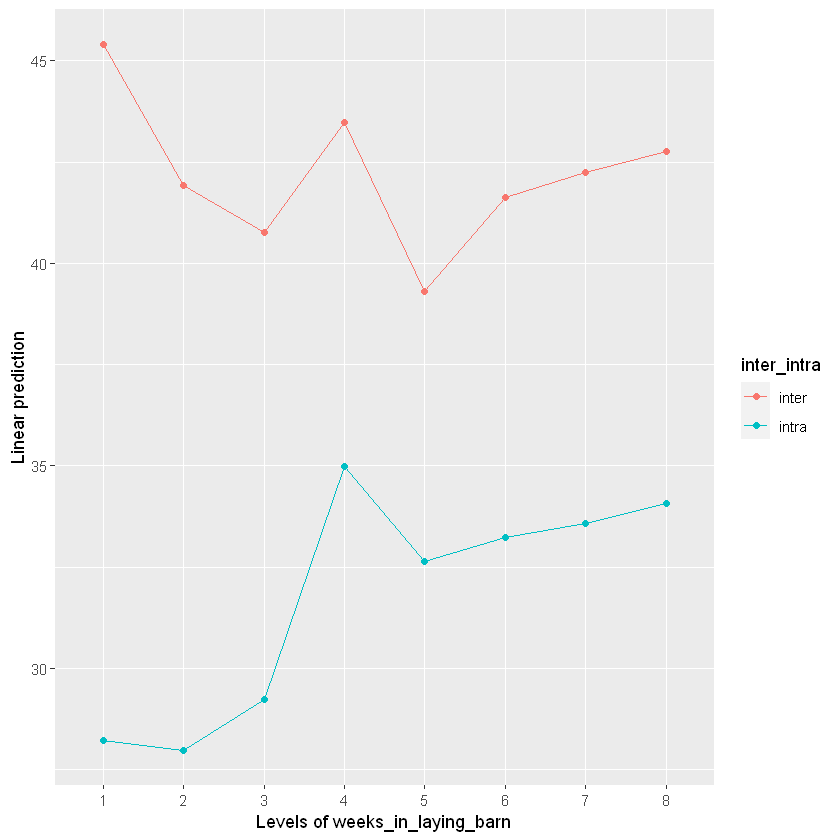

In [143]:
emmip(fit, inter_intra~weeks_in_laying_barn)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) +  
    DIB + inter_intra + DIB * inter_intra + Treatment * inter_intra +  
    (1 | PenID/henID1) + (1 | factor(DIB)) + (1 | overallCLASS)
   Data: df

REML criterion at convergence: 42786.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0837 -0.5076 -0.0055  0.5450  4.7262 

Random effects:
 Groups       Name        Variance Std.Dev.
 henID1:PenID (Intercept) 0.114386 0.33821 
 factor(DIB)  (Intercept) 0.077589 0.27855 
 PenID        (Intercept) 0.016523 0.12854 
 overallCLASS (Intercept) 0.001247 0.03531 
 Residual                 2.051349 1.43225 
Number of obs: 11918, groups:  
henID1:PenID, 132; factor(DIB), 50; PenID, 8; overallCLASS, 6

Fixed effects:
                                 Estimate Std. Error         df t value
(Intercept)                     4.459e+00  1.276e-01  3.319e+01  34.938

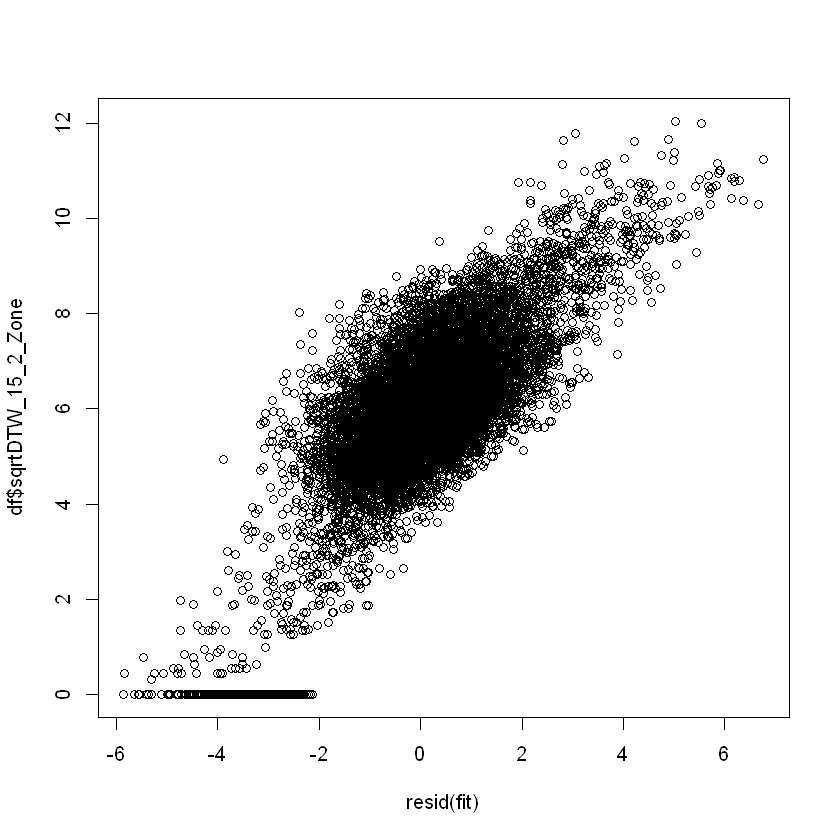

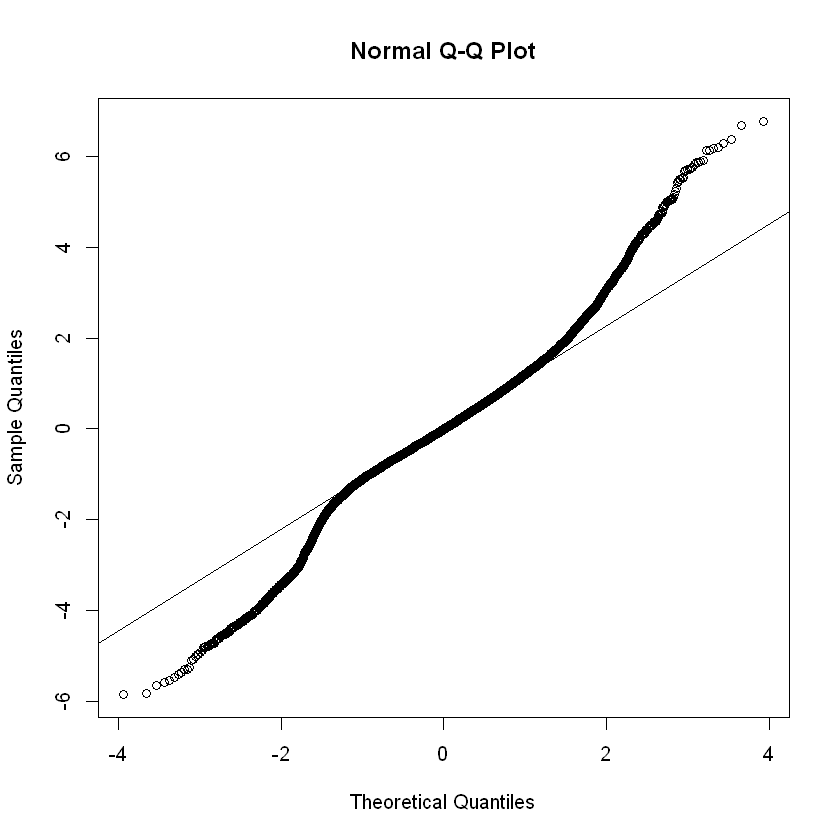

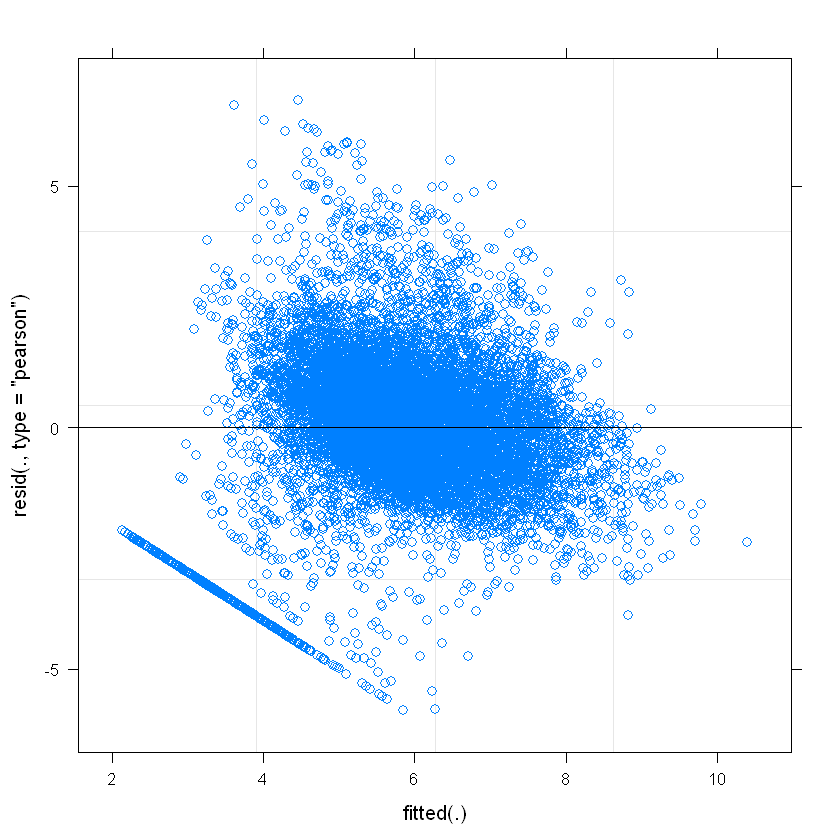

In [114]:
df$sqrtDTW_15_2_Zone = sqrt(df$DTW_15_2_Zone)
df_NOMEXP$sqrtDTW_15_2_Zone = sqrt(df_NOMEXP$DTW_15_2_Zone)
#fit = lmer(DTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone + DIB + inter_intra + DIB*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)) + (1|HenID1_CLASS) + (1|HenID2_CLASS), data=df)
#fit = lmer(DTW_15_2_Zone ~ min_nbr_stays_2_Zone + max_nbr_stays_2_Zone + DIB^2 + inter_intra + DIB^2*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)), 
#           data=df_NOMEXP)
#Treatment*inter_intra as we expect the treatment o be different in the intra not the inter
fit = lmer(sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) + DIB + inter_intra + DIB*inter_intra + Treatment*inter_intra + (1|PenID/henID1) + (1|factor(DIB)) +(1|overallCLASS), 
           data=df)
#fit = lmer(sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) + factDIB + inter_intra + factDIB*inter_intra + Treatment*inter_intra + (1|PenID/henID1) +(1|overallCLASS), 
#           data=df)
#fit = lmer(sqrtDTW_15_2_Zone ~ sqrt(min_nbr_stays_2_Zone) + sqrt(max_nbr_stays_2_Zone) + factDIB + inter_intra + factDIB*inter_intra + Treatment*inter_intra + (1|PenID/henID1), 
#           data=df_NOMEXP)
summary(fit)
plot(resid(fit),df$sqrtDTW_15_2_Zone)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
sqrtchi2distance ~ sqrt(max_Total_number_transition) + sqrt(min_Total_number_transition) +  
    DIB + inter_intra + DIB * inter_intra + Treatment * inter_intra +  
    (1 | PenID/henID1) + (1 | factor(DIB)) + (1 | overallCLASS)
   Data: df

REML criterion at convergence: -9900.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0772 -0.6216 -0.0995  0.5276  4.8806 

Random effects:
 Groups       Name        Variance  Std.Dev.
 henID1:PenID (Intercept) 3.153e-04 0.01776 
 factor(DIB)  (Intercept) 3.964e-04 0.01991 
 PenID        (Intercept) 1.234e-04 0.01111 
 overallCLASS (Intercept) 5.857e-06 0.00242 
 Residual                 2.494e-02 0.15792 
Number of obs: 11918, groups:  
henID1:PenID, 132; factor(DIB), 50; PenID, 8; overallCLASS, 6

Fixed effects:
                                    Estimate Std. Error         df t value
(Intercept)                        3.539e-01  1.1

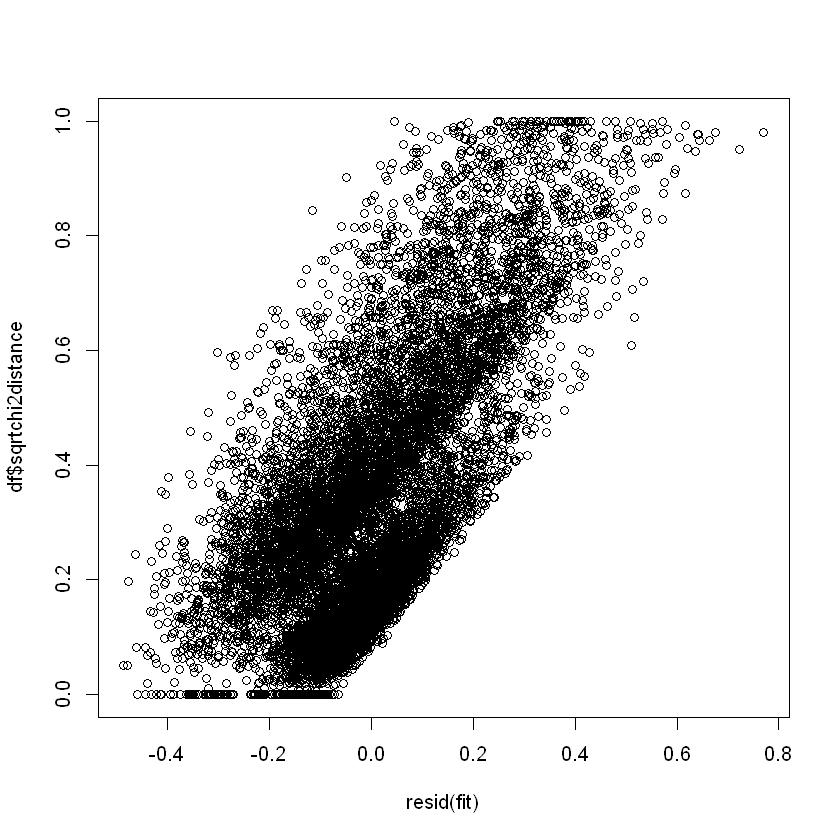

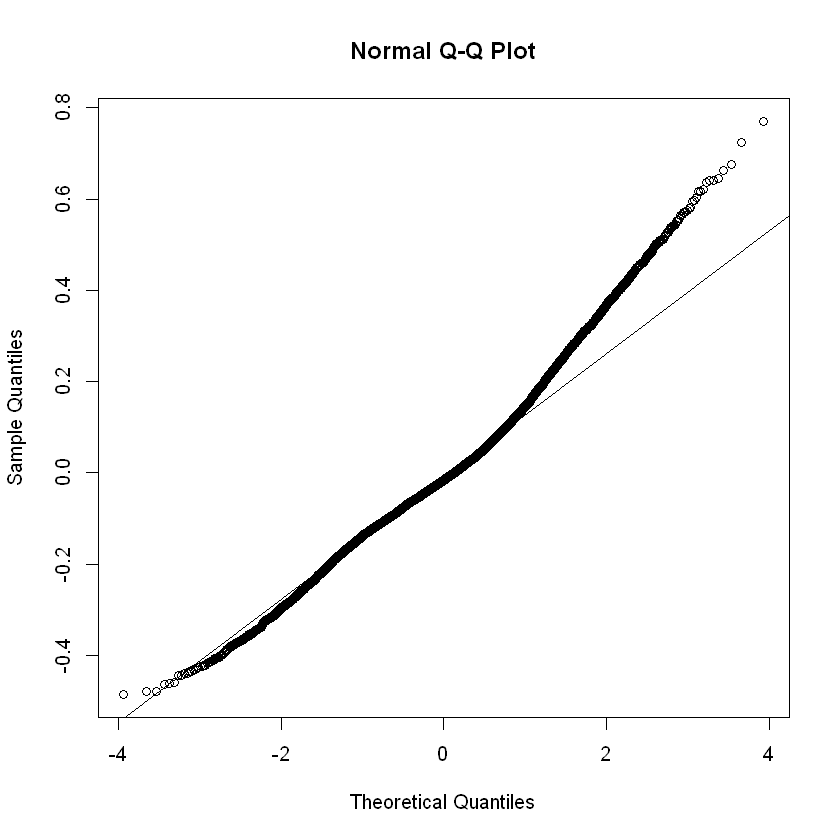

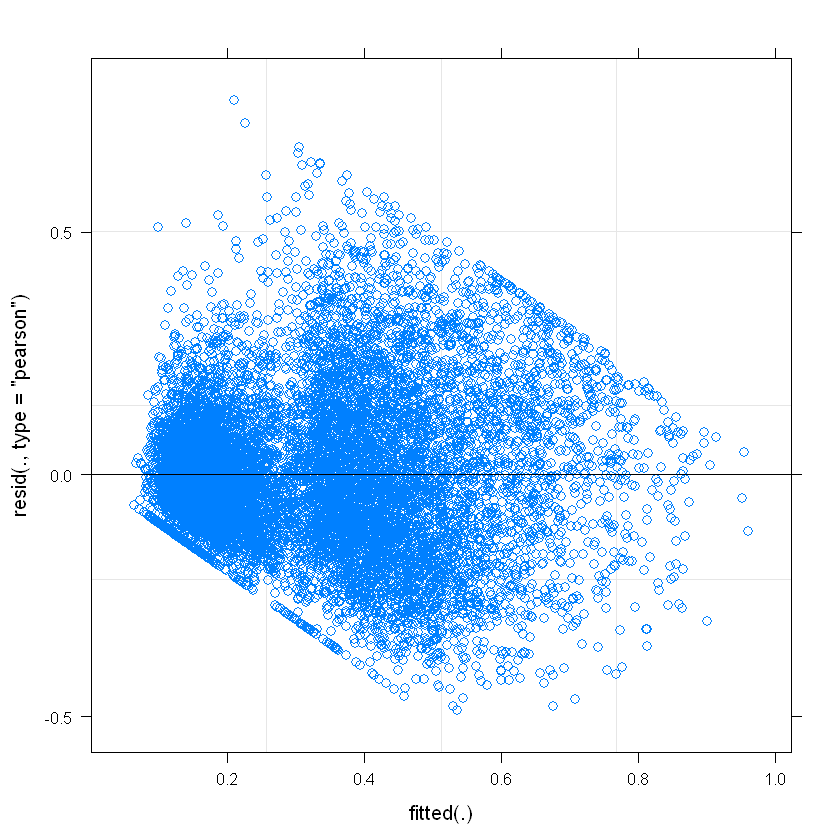

In [102]:
#Treatment*inter_intra as we expect the treatment o be different in the intra not the inter
fit = lmer(sqrtchi2distance ~ sqrt(max_Total_number_transition) + sqrt(min_Total_number_transition) + DIB + inter_intra + DIB*inter_intra + Treatment*inter_intra + (1|PenID/henID1) + (1|factor(DIB)) +(1|overallCLASS), 
           data=df)
#fit = lmer(sqrt(sqrt(chi2distance)) ~ sqrt(max_Total_number_transition) + sqrt(min_Total_number_transition) + DIB + inter_intra + DIB*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)), 
#           data=df_NOMEXP)
#fit = glmer(chi2distance100~max_Total_number_transition + min_Total_number_transition + DIB + inter_intra + DIB*inter_intra + Treatment + (1|PenID/henID1) + (1|factor(DIB)), 
#          data=df_NOMEXP, family=poisson(link = "log")) #poisson(link = "log")
summary(fit)
plot(resid(fit),df$sqrtchi2distance)
qqnorm(resid(fit))
qqline(resid(fit))
plot(fit)

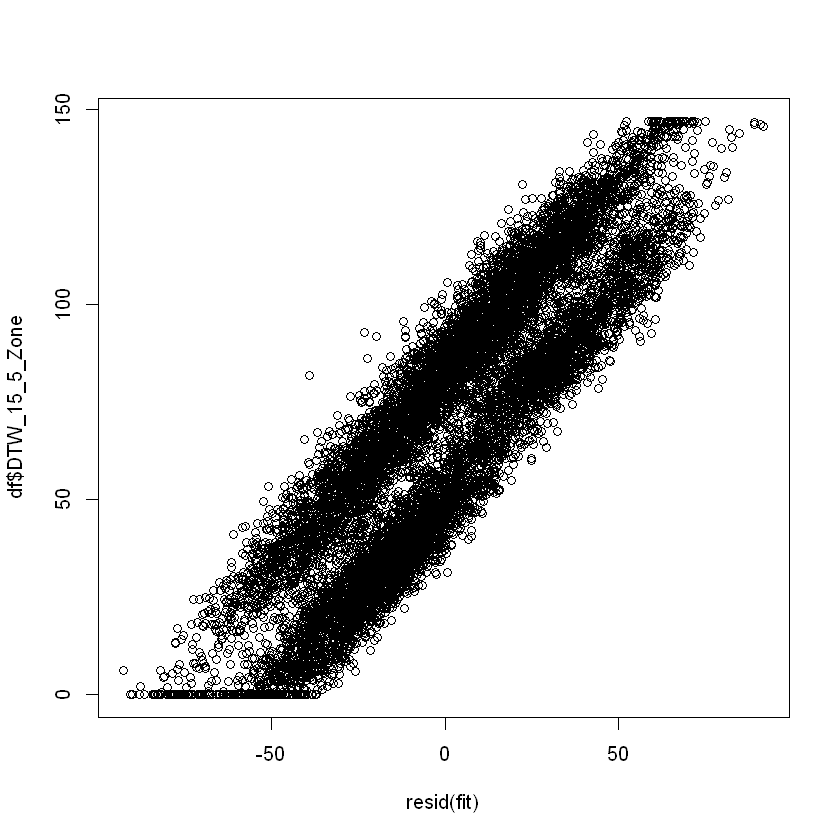

In [100]:
#linearity of predictors: plot residual vs observed
#jpeg(file.path(path_, paste('diagnostic_plot_linearity_',name,'.jpg', sep='')))
plot(resid(fit),df$DTW_15_5_Zone)
#dev.off()

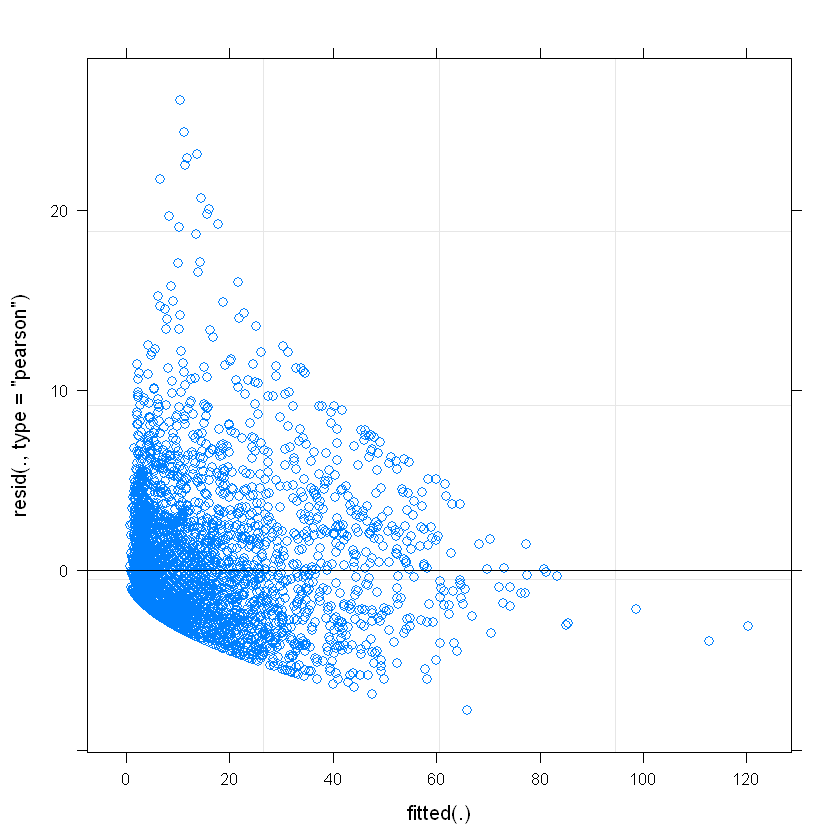

In [59]:
#check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups
plot(fit)
#There seems to be even spread around the centered line

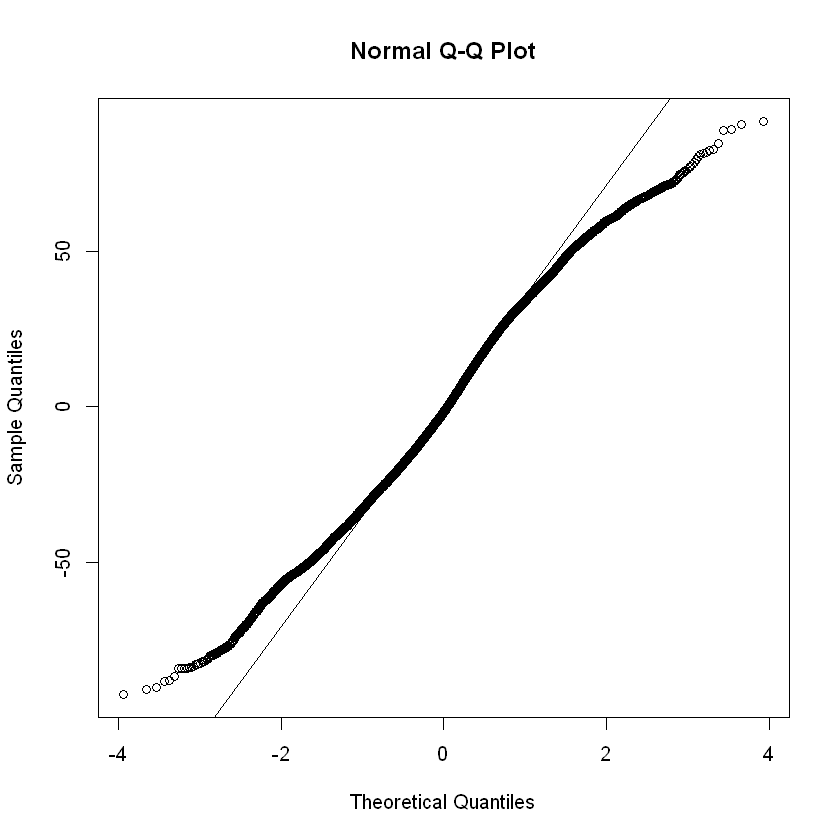

In [102]:
#normally distributed residuals
#qqmath(fit) #same
qqnorm(resid(fit))
qqline(resid(fit))

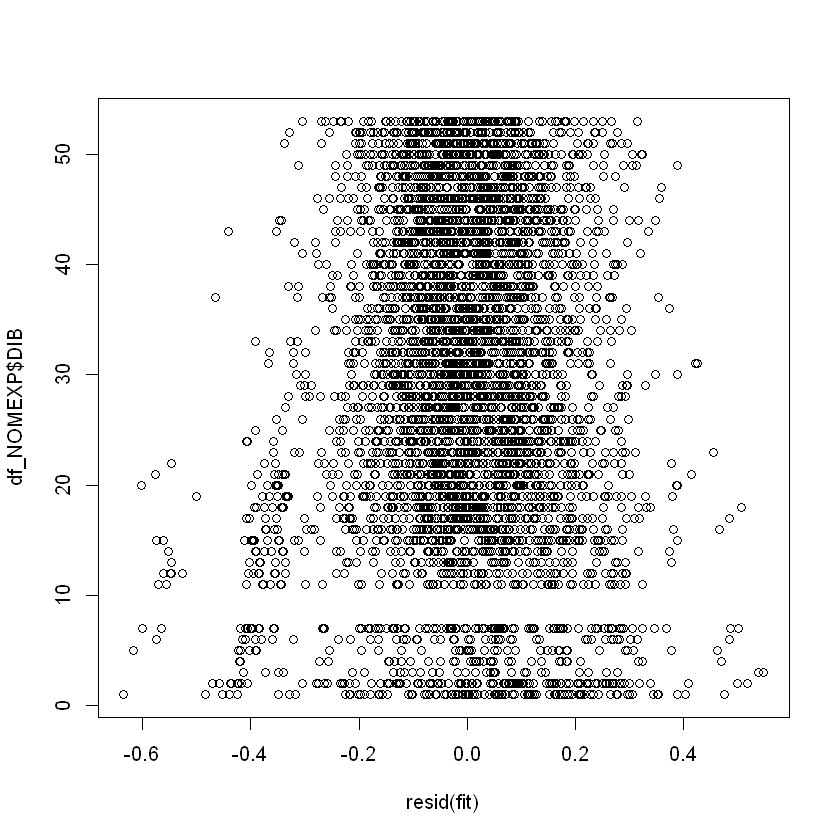

In [63]:
#The residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
plot(resid(fit),df_NOMEXP$DIB)

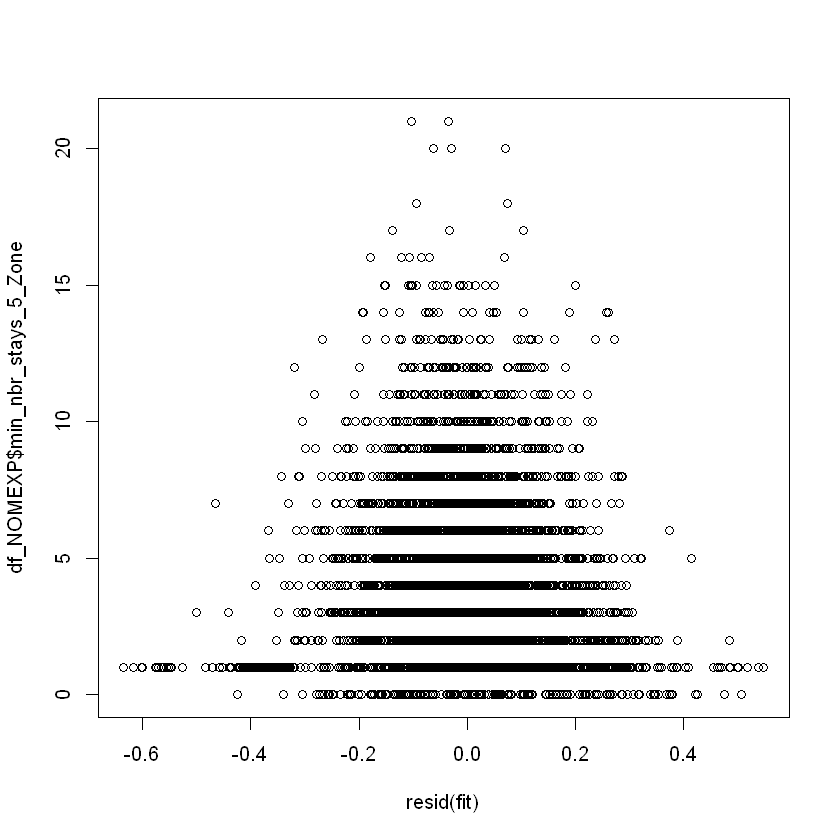

In [64]:
plot(resid(fit),df_NOMEXP$min_nbr_stays_5_Zone)

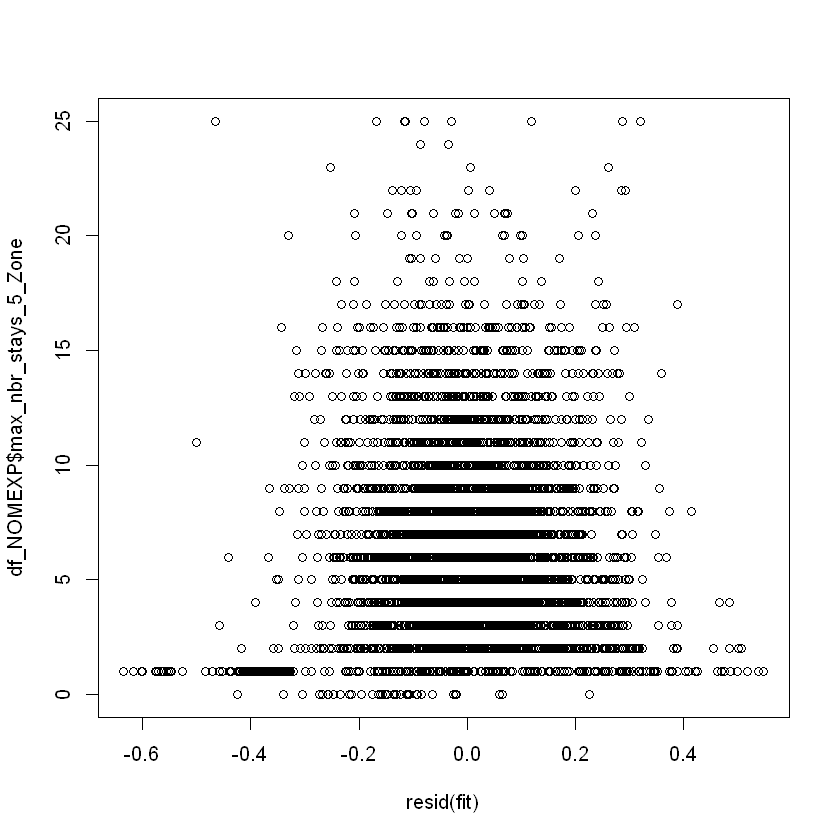

In [65]:
plot(resid(fit),df_NOMEXP$max_nbr_stays_5_Zone)

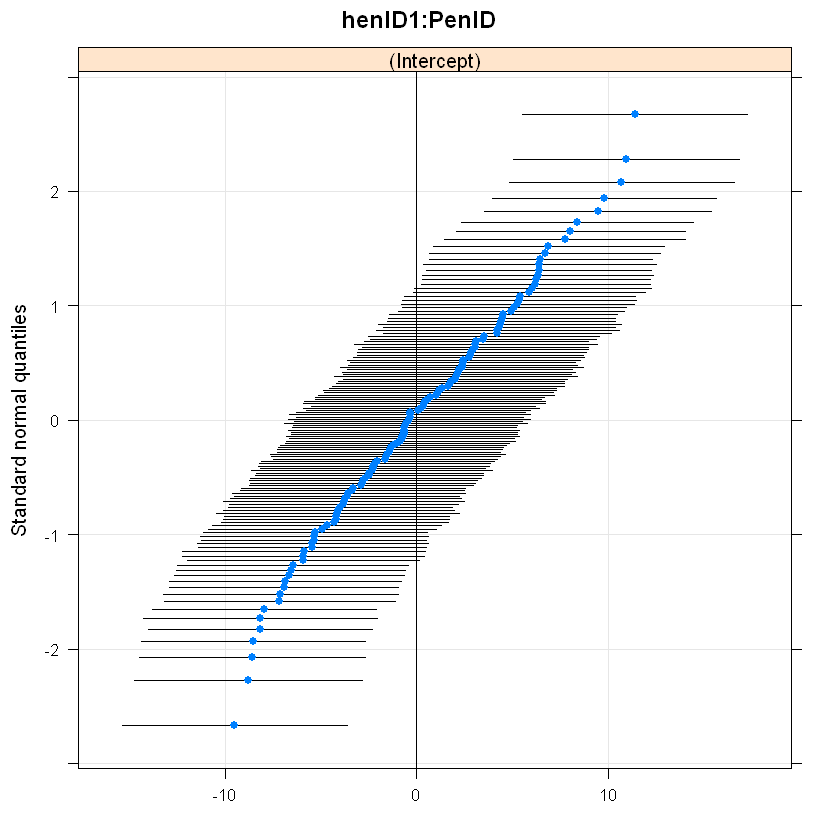

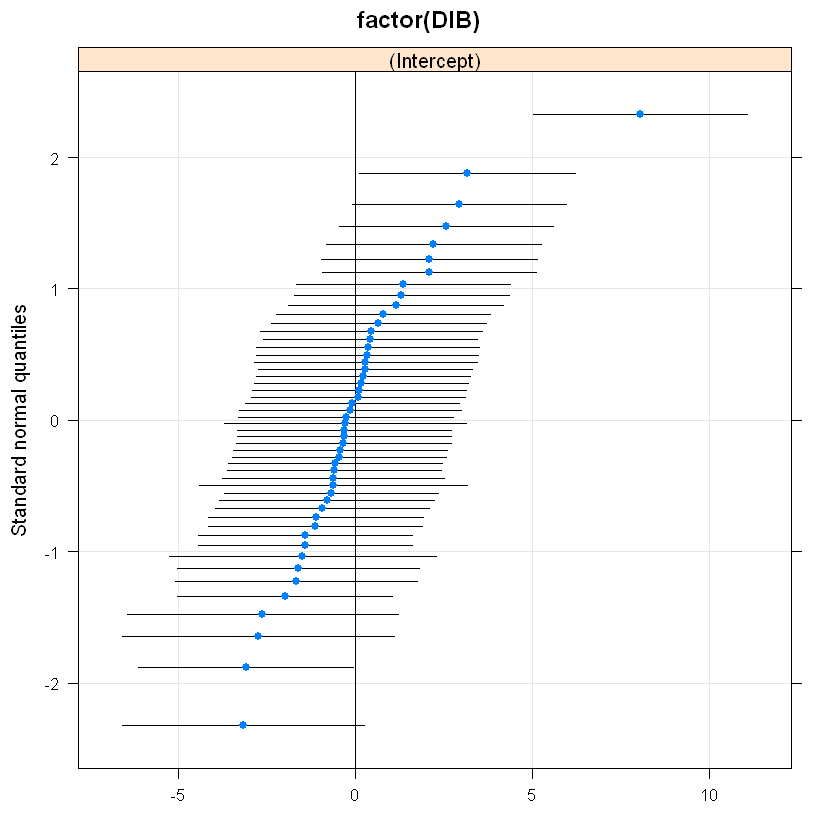

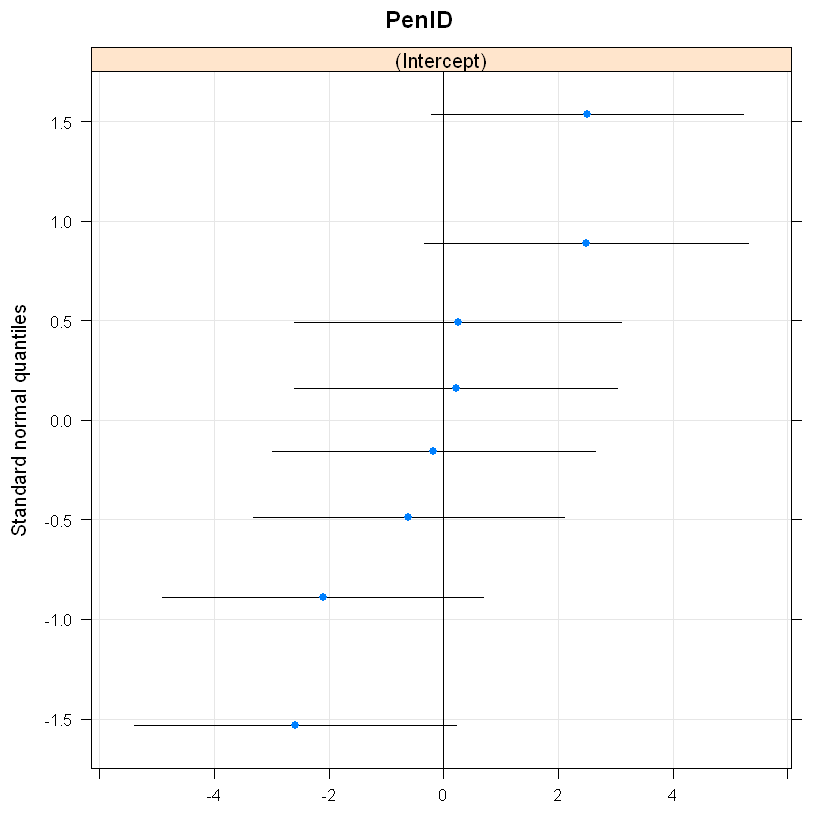

$`henID1:PenID`

$`factor(DIB)`

$PenID

$HenID2_CLASS

$HenID1_CLASS


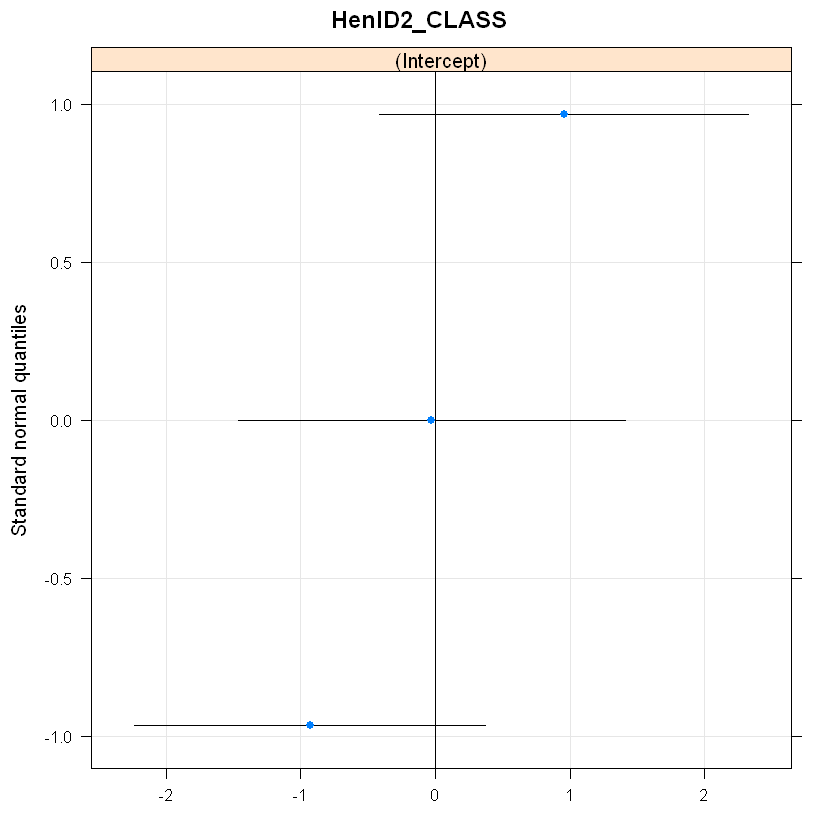

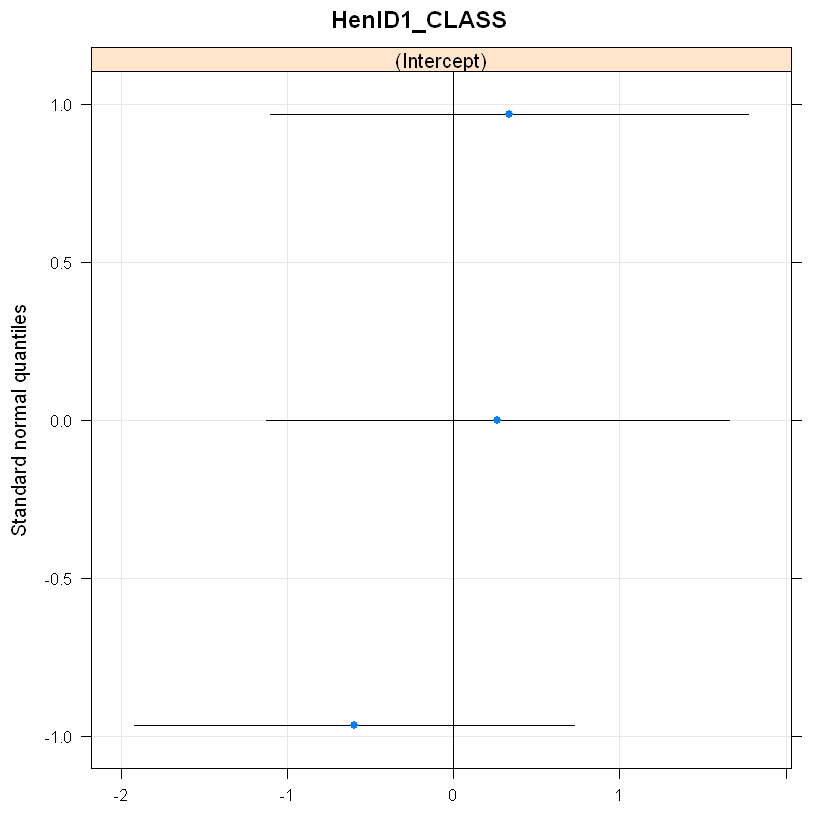

In [103]:
#qqplot
qqmath(ranef(fit))

### Linearity assumption

In [ ]:
qplot(year, lifeExp, data = gapminder.sub, main = paste("Life expectancy in", country.name)) +
  geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'



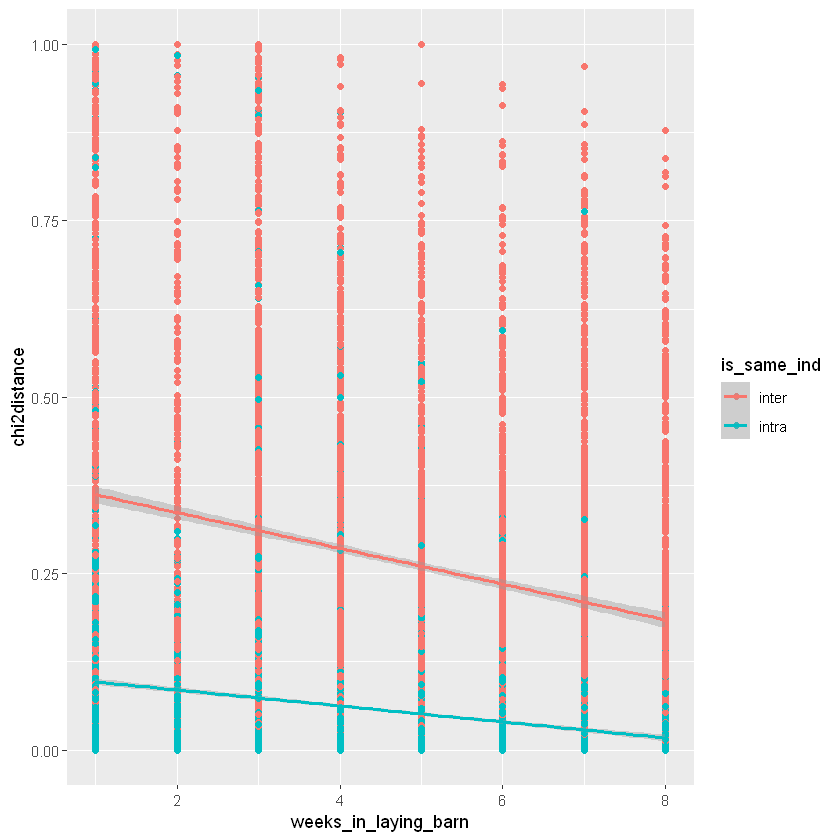

In [82]:
qplot(x = weeks_in_laying_barn, y = chi2distance, color = is_same_ind, data = df) +
  stat_smooth(method = "lm", se = TRUE, fullrange = TRUE)

`geom_smooth()` using formula 'y ~ x'



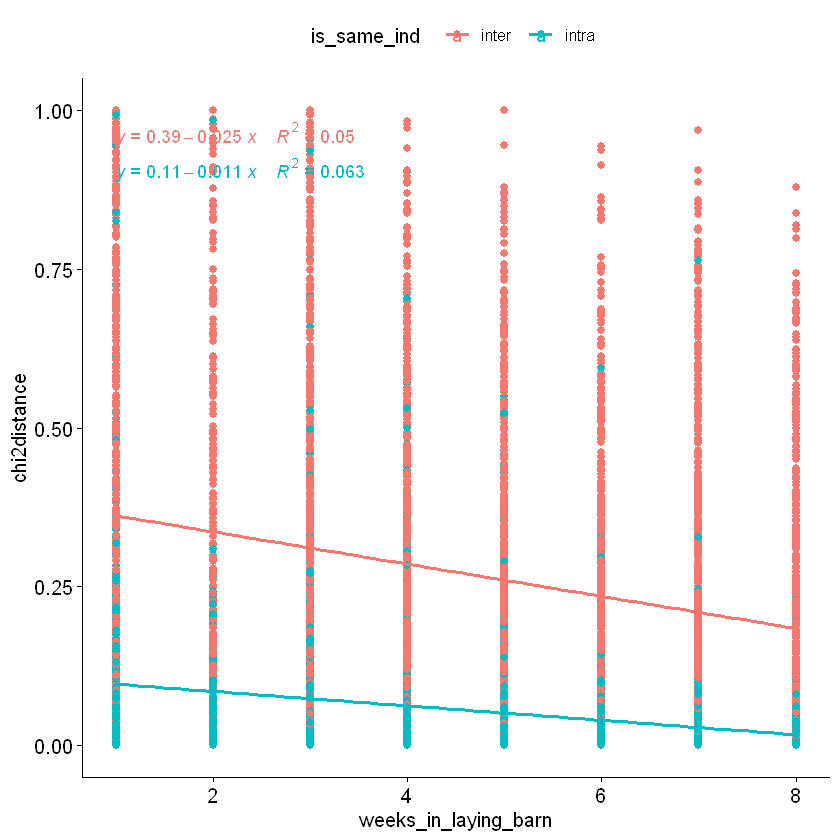

In [85]:
ggscatter(
  df, x = "weeks_in_laying_barn", y = "chi2distance",
  color = "is_same_ind", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = is_same_ind)
    )

### Homogeneity of regression slopes

In [4]:
df %>% anova_test(SQRTPercentagenotmoving ~ Treatment*DOA)

Coefficient covariances computed by hccm()



,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Treatment,1,52,31.343,8.23e-07,*,0.376000
2,DOA,1,52,136.758,3.56e-16,*,0.725000
3,Treatment:DOA,1,52,0.016,9.00e-01,,0.000305


### Normality of residuals

In [5]:
# Fit the model, the covariate goes first
model <- lm(SQRTPercentagenotmoving ~ DOA + Treatment, data = df)
# Inspect the model diagnostic metrics
model.metrics <- augment(model)
head(model.metrics, 3)

SQRTPercentagenotmoving,DOA,Treatment,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.288690,119,OFH,6.276508,1.012182,0.08706841,0.8599265,0.04777896,1.225936
7.806247,119,TRAN,4.971391,2.834856,0.08706841,0.7692652,0.37478458,3.433526
4.677072,120,OFH,6.121666,-1.444594,0.08041887,0.8470026,0.08859416,-1.743329


In [6]:
# Assess normality of residuals using shapiro wilk test
shapiro_test(model.metrics$.resid)

variable,statistic,p.value
<chr>,<dbl>,<dbl>
model.metrics$.resid,0.9746566,0.2845212


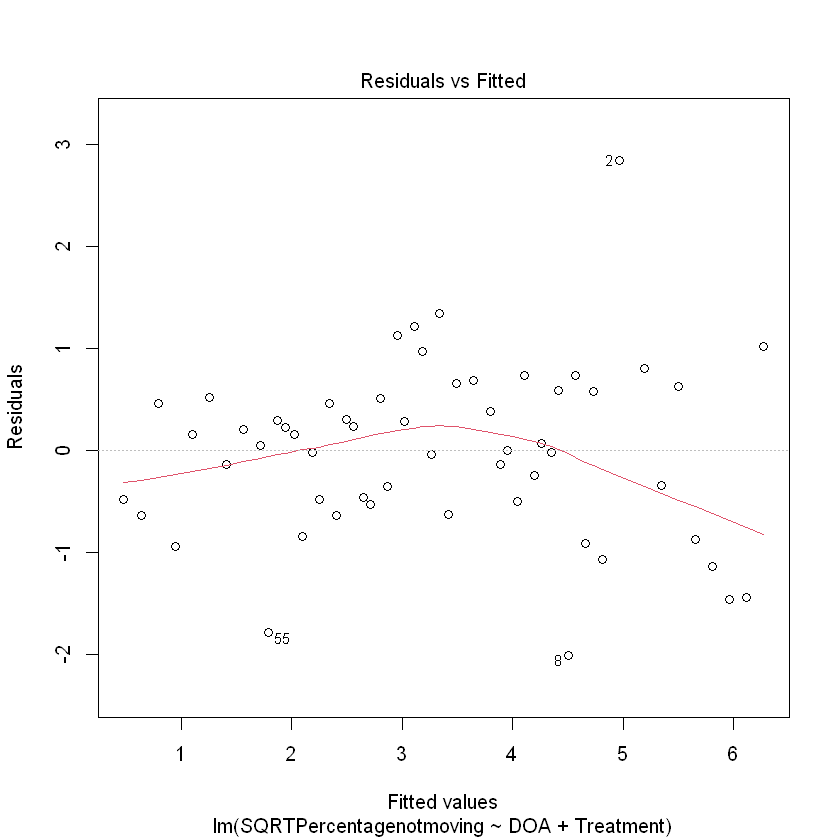

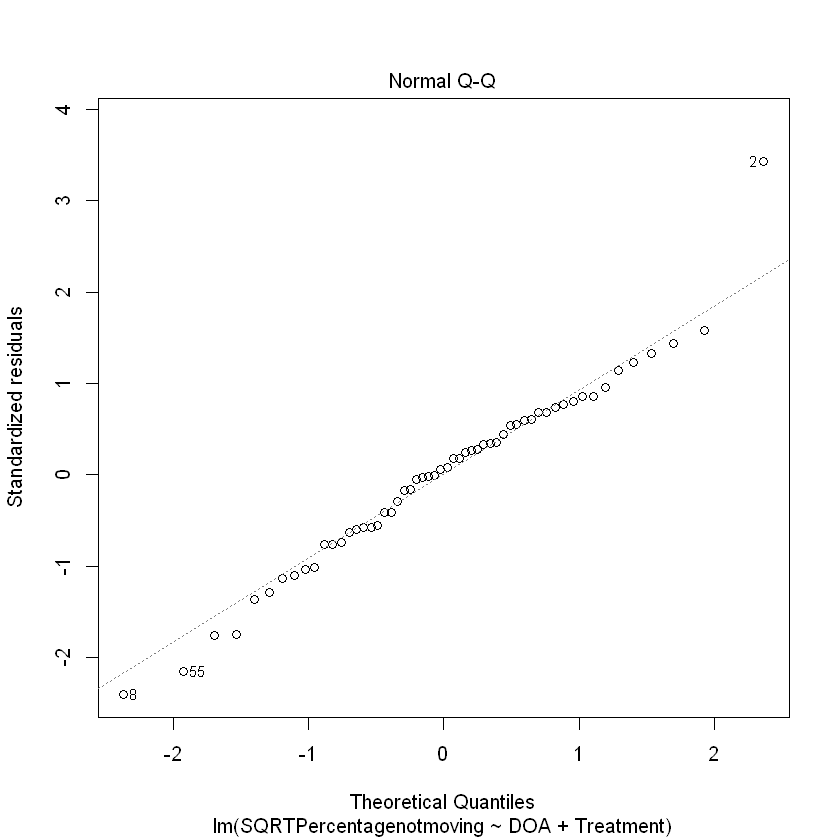

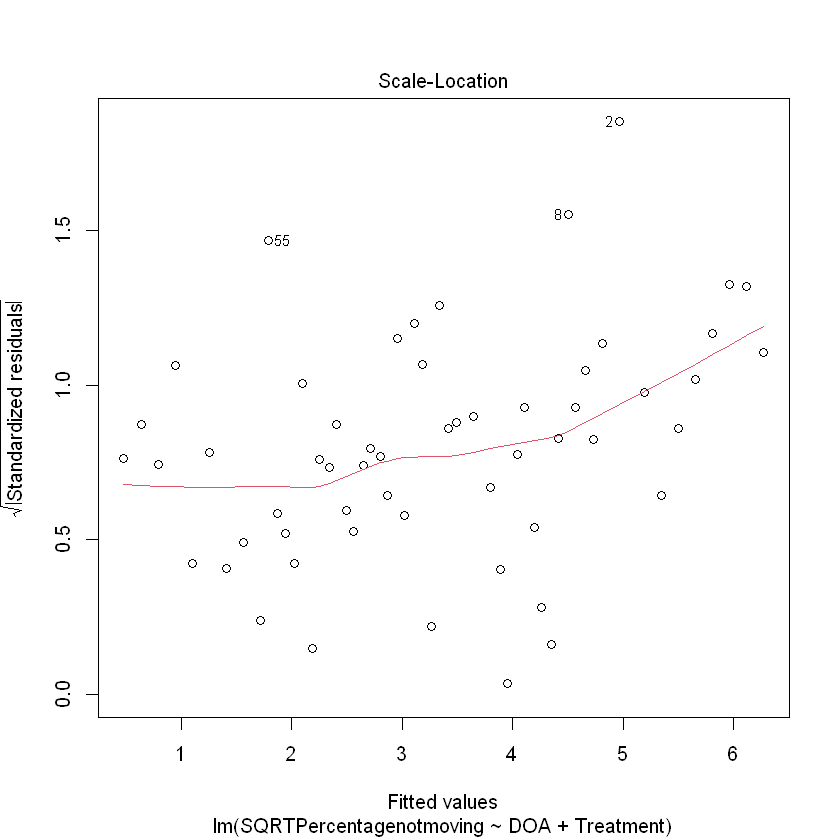

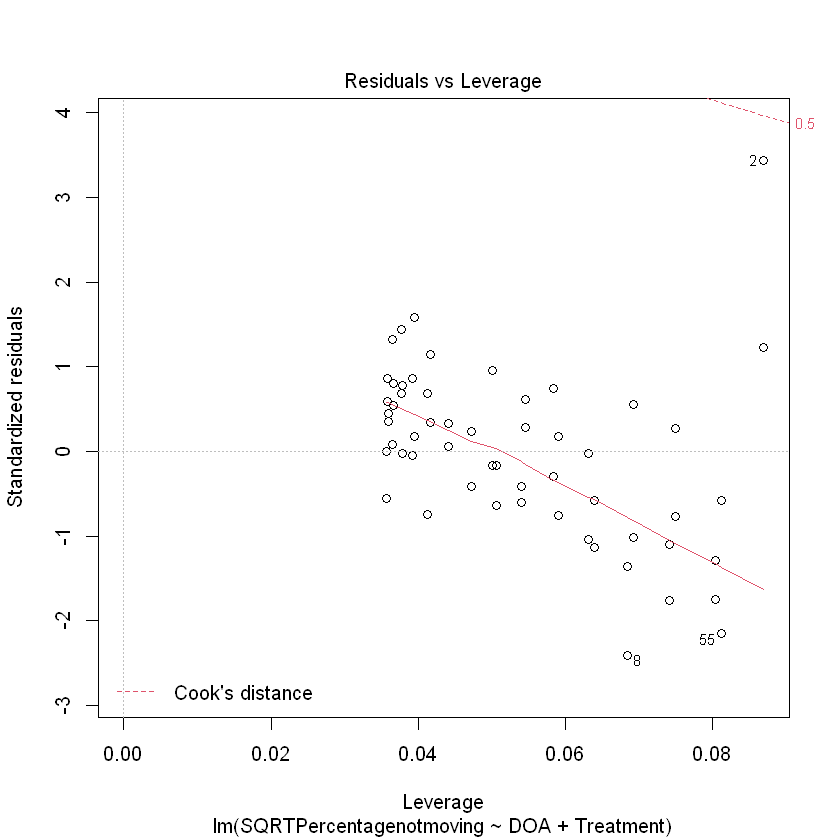

In [7]:
plot(model)

### Homogeneity of variances

In [14]:
leveneTest(.resid ~ Treatment, data=model.metrics)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.3975178,0.5310332
,54,NA,NA


### outliers

In [15]:
model.metrics %>% 
  filter(abs(.std.resid) > 3) %>%
  as.data.frame()

SQRTPercentagenotmoving,DOA,Treatment,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.806247,119,TRAN,4.971391,2.834856,0.08706841,0.7692652,0.3747846,3.433526


There is one outliers in the data the first day, should I remove it?

# ANCOVA

In [16]:
res.aov <- df %>% anova_test(SQRTPercentagenotmoving ~ DOA + Treatment)
get_anova_table(res.aov)

Coefficient covariances computed by hccm()



,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,DOA,1,53,139.346,1.86e-16,*,0.724
2,Treatment,1,53,31.936,6.46e-07,*,0.376


In [23]:
summary(res.aov)

    Effect               DFn         DFd           F         
 Length:2           Min.   :1   Min.   :53   Min.   : 31.94  
 Class :character   1st Qu.:1   1st Qu.:53   1st Qu.: 58.79  
 Mode  :character   Median :1   Median :53   Median : 85.64  
                    Mean   :1   Mean   :53   Mean   : 85.64  
                    3rd Qu.:1   3rd Qu.:53   3rd Qu.:112.49  
                    Max.   :1   Max.   :53   Max.   :139.35  
       p                p<.05                ges       
 Min.   :0.000e+00   Length:2           Min.   :0.376  
 1st Qu.:1.615e-07   Class :character   1st Qu.:0.463  
 Median :3.230e-07   Mode  :character   Median :0.550  
 Mean   :3.230e-07                      Mean   :0.550  
 3rd Qu.:4.845e-07                      3rd Qu.:0.637  
 Max.   :6.460e-07                      Max.   :0.724  

In [17]:
emmeans_test(SQRTPercentagenotmoving ~ Treatment, covariate = DOA, data=df, p.adjust.method = "bonferroni")

ERROR: Error: Column name `std.error` must not be duplicated.


In [18]:
pwc <- df %>% 
  emmeans_test(
    SQRTPercentagenotmoving ~ Treatment, covariate = DOA,
    p.adjust.method = "bonferroni"
    )
pwc

ERROR: Error: Column name `std.error` must not be duplicated.


In [19]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=French_Switzerland.1252  LC_CTYPE=French_Switzerland.1252   
[3] LC_MONETARY=French_Switzerland.1252 LC_NUMERIC=C                       
[5] LC_TIME=French_Switzerland.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] car_3.0-10      carData_3.0-4   reshape2_1.4.4  emmeans_1.5.4  
 [5] lmerTest_3.1-3  WRS2_1.1-0      rstatix_0.6.0   ggpubr_0.4.0   
 [9] broom_0.7.4     lme4_1.1-26     Matrix_1.2-18   modEvA_2.0     
[13] MASS_7.3-53     leaps_3.1       caret_6.0-86    lattice_0.20-41
[17] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.3     purrr_0.3.4    
[21] readr_1.4.0     tidyr_1.1.2     tibble_3.0.6    ggplot2_3.3.3  
[25] tidyverse_1.3.0 lindia_0.9      DHARMa_0.3.3.0 

loaded via a namespace (and not attached):
 [1] minqa_1.2.4      